In [1]:
! pip install geopandas qeds -q

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
#cargamos las librerías

# Para omitir los mensajes de warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import time
from collections import Counter

import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Carga de datos

In [4]:
#la ruta donde se encuentra el archivo
subterranea="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_37/main/RETO/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df_sub = pd.read_csv(subterranea, encoding='cp1252')
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [5]:
for colum in list(df_sub.columns):
  
  try:
    df_sub[colum] = df_sub[colum].str.replace('<', '', regex=True) #Reemplazar valores con <
    df_sub[colum] = df_sub[colum].str.replace('=', '', regex=True) #Reemplazar valores con =

    try:
      df_sub[colum] = df_sub[colum].astype(float) #Convertir columas a flotantes
      
    except:
      pass

  except:
    pass

  df_sub[colum] = pd.to_numeric(df_sub[colum], errors='coerce').fillna(df_sub[colum]) #Convertir columas a Numericos

df_sub.head().T

,0,1,2,3,4
CLAVE,DLAGU6,DLAGU6516,DLAGU7,DLAGU9,DLBAJ107
SITIO,POZO SAN GIL,POZO R013 CAÑADA HONDA,POZO COSIO,POZO EL SALITRILLO,RANCHO EL TECOLOTE
ORGANISMO_DE_CUENCA,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,PENINSULA DE BAJA CALIFORNIA
ESTADO,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,BAJA CALIFORNIA SUR
MUNICIPIO,ASIENTOS,AGUASCALIENTES,COSIO,RINCON DE ROMOS,LA PAZ
ACUIFERO,VALLE DE CHICALOTE,VALLE DE CHICALOTE,VALLE DE AGUASCALIENTES,VALLE DE AGUASCALIENTES,TODOS SANTOS
SUBTIPO,POZO,POZO,POZO,POZO,POZO
LONGITUD,-102.0221,-102.20075,-102.28801,-102.29449,-110.2448
LATITUD,22.20887,21.99958,22.36685,22.18435,23.45138
PERIODO,2020,2020,2020,2020,2020


In [6]:
df_sub.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1068,1068,DLAGU6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1068,1066,EL FUERTE,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1068,13,CUENCAS CENTRALES DEL NORTE,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1068,32,DURANGO,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1068,452,LA PAZ,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1068,273,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1068,8,POZO,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1068.0,NaN,NaN,NaN,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.86412
LATITUD,1068.0,NaN,NaN,NaN,23.163618,3.88767,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


## Balance de categorias

In [7]:
#Lista de semaforo
df_sub['SEMAFORO'].unique().tolist()

['Verde', 'Rojo', 'Amarillo']

Conteo de datos deacuerdo a su etiqueta de semaforo

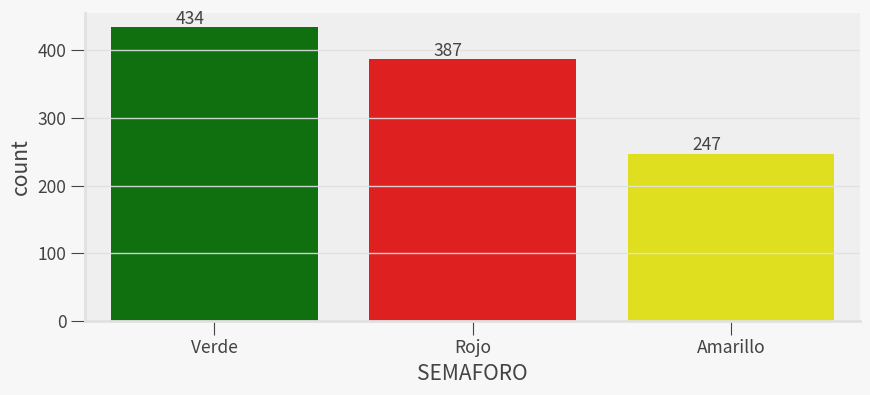

In [8]:
color_list = ['green','red', 'yellow']

fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(data=df_sub, x='SEMAFORO',  palette=color_list)

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.25,p.get_height()+5))

plt.show()


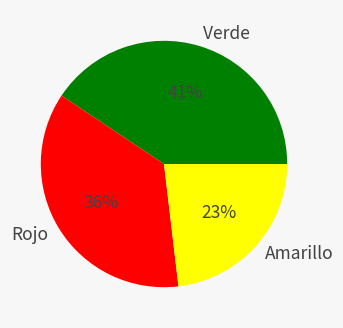

In [9]:
semaforo = Counter(df_sub['SEMAFORO'])
colors_palete = sns.color_palette(color_list)

fig, ax = plt.subplots(figsize=(10,4))

plt.pie(semaforo.values(), labels=semaforo.keys(), colors=colors_palete, autopct='%.0f%%')

plt.show()

## Tipos de columnas

In [10]:
df_sub.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_

In [11]:
df_sub['ORGANISMO_DE_CUENCA'].unique()

array(['LERMA SANTIAGO PACIFICO', 'PENINSULA DE BAJA CALIFORNIA',
       'PENINSULA DE YUCATAN', 'RIO BRAVO', 'CUENCAS CENTRALES DEL NORTE',
       'PACIFICO NORTE', 'BALSAS', 'PACIFICO SUR', 'GOLFO NORTE',
       'AGUAS DEL VALLE DE MEXICO', 'GOLFO CENTRO', 'FRONTERA SUR',
       'NOROESTE'], dtype=object)

## Visualizacion de datos perdidos

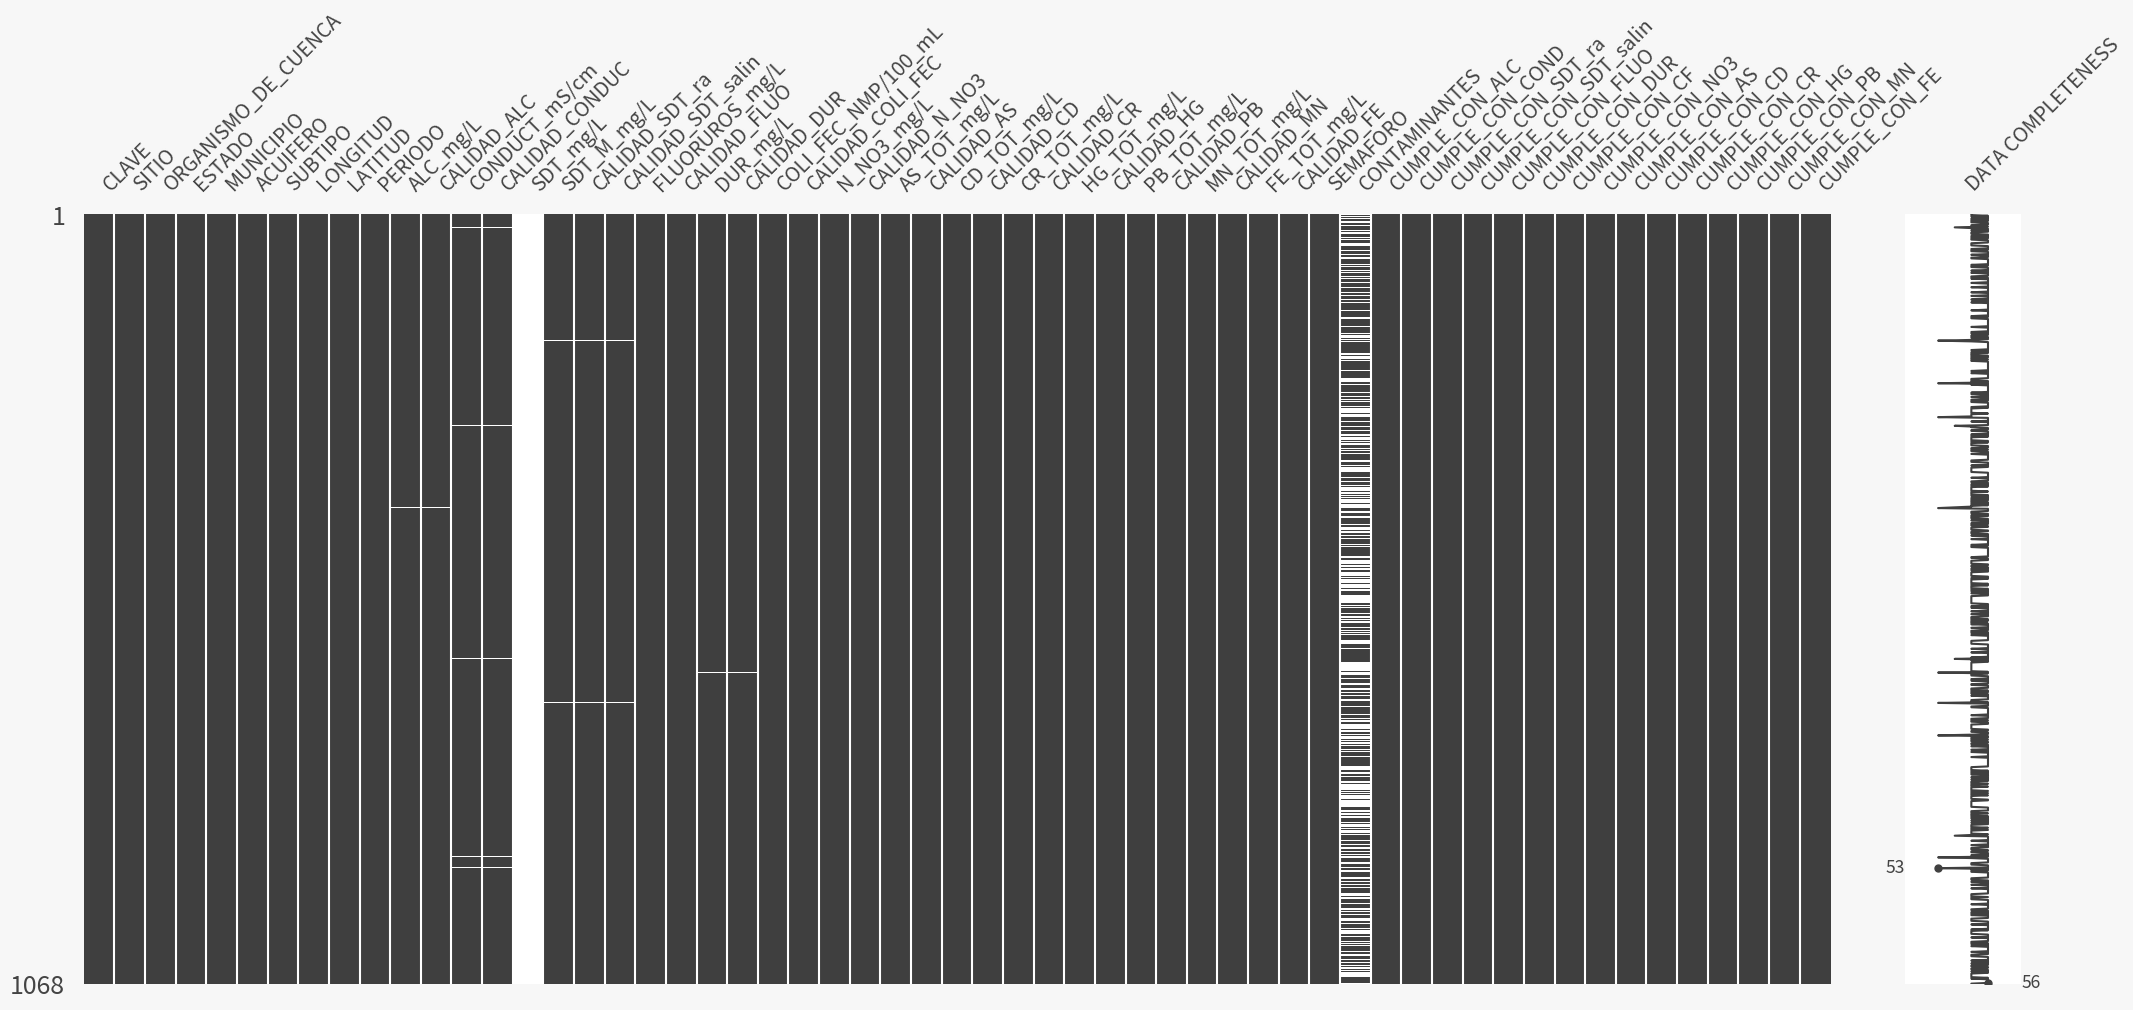

In [12]:
#msno.matrix(df_sub, labels=list(df_sub.columns),label_rotation=90)
msno.matrix(df_sub, labels=list(df_sub.columns))
plt.show()

In [13]:
#esta variable no tiene nada.
df_sub['SDT_mg/L'].unique()
df_sub['SDT_mg/L'].value_counts()

Series([], Name: SDT_mg/L, dtype: int64)

In [14]:
#esta variable solo tiene un dato.
df_sub['PERIODO'].unique()
df_sub['PERIODO'].value_counts()

2020    1068
Name: PERIODO, dtype: int64

## Seleccion de columnas numericas

In [15]:
float_columns = [col for col in df_sub.columns if df_sub[col].dtypes != object]
print(len(float_columns), float_columns)

18 ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']


## Distribucion de datos contiuos

### Histogramas

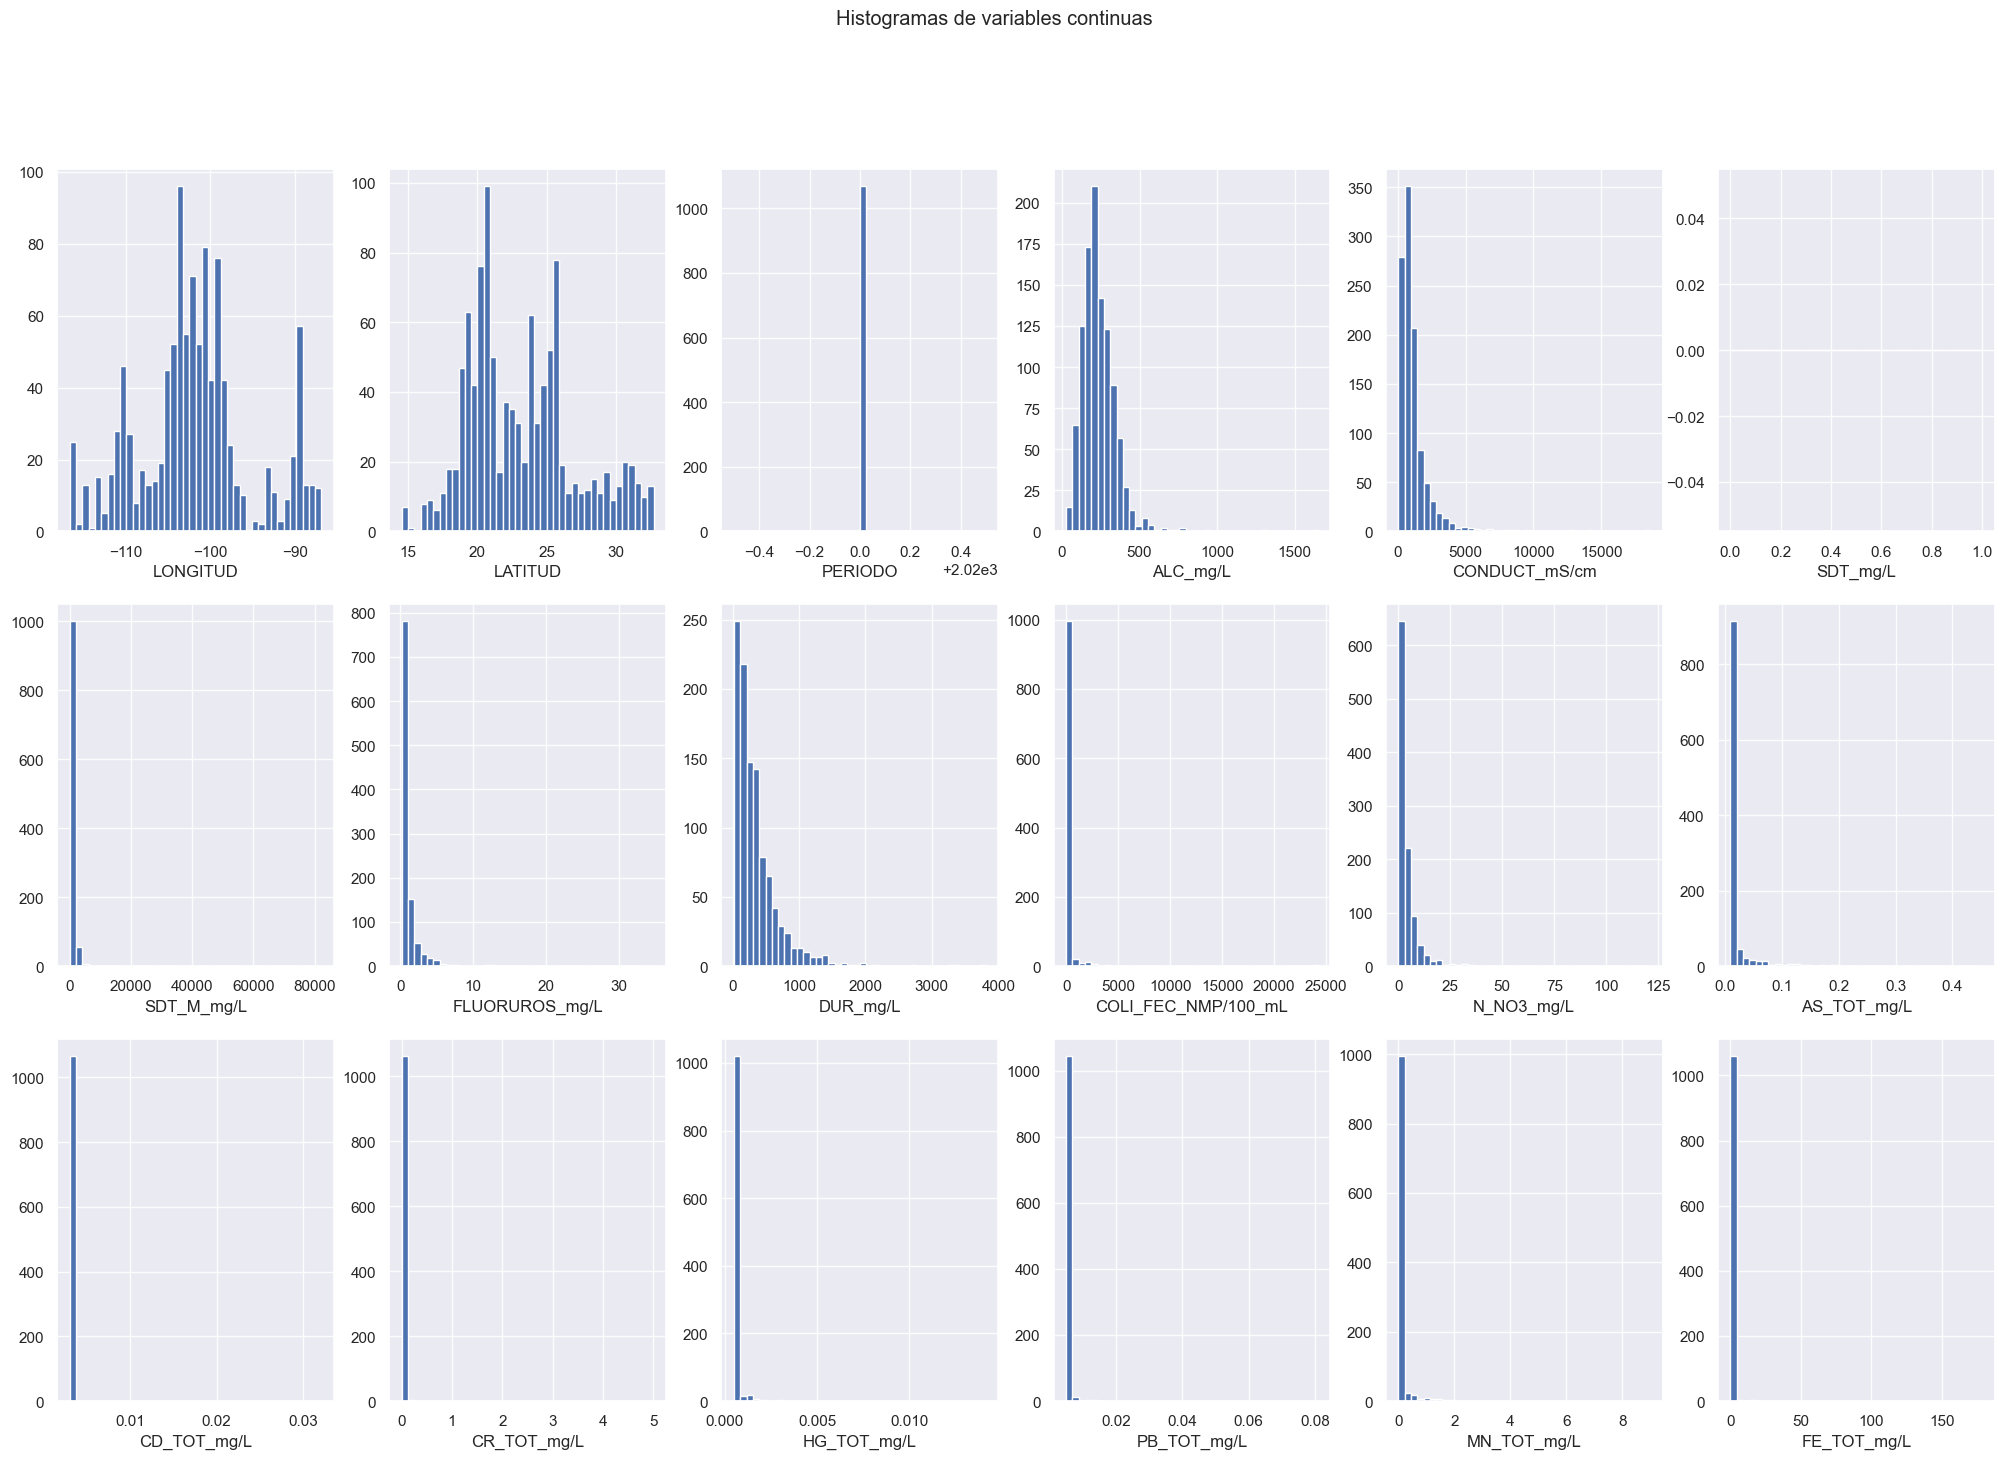

In [16]:
sns.set(rc={'figure.figsize':(25,16)})
i = 0
fig, axes = plt.subplots(3, 6)    
for col in float_columns:
  plt.subplot(3,6,i+1)    
  plt.hist(df_sub[col].dropna(), bins=40)   
  plt.xlabel(col)
  i+=1

fig.suptitle('Histogramas de variables continuas')
plt.show()

### Boxplots

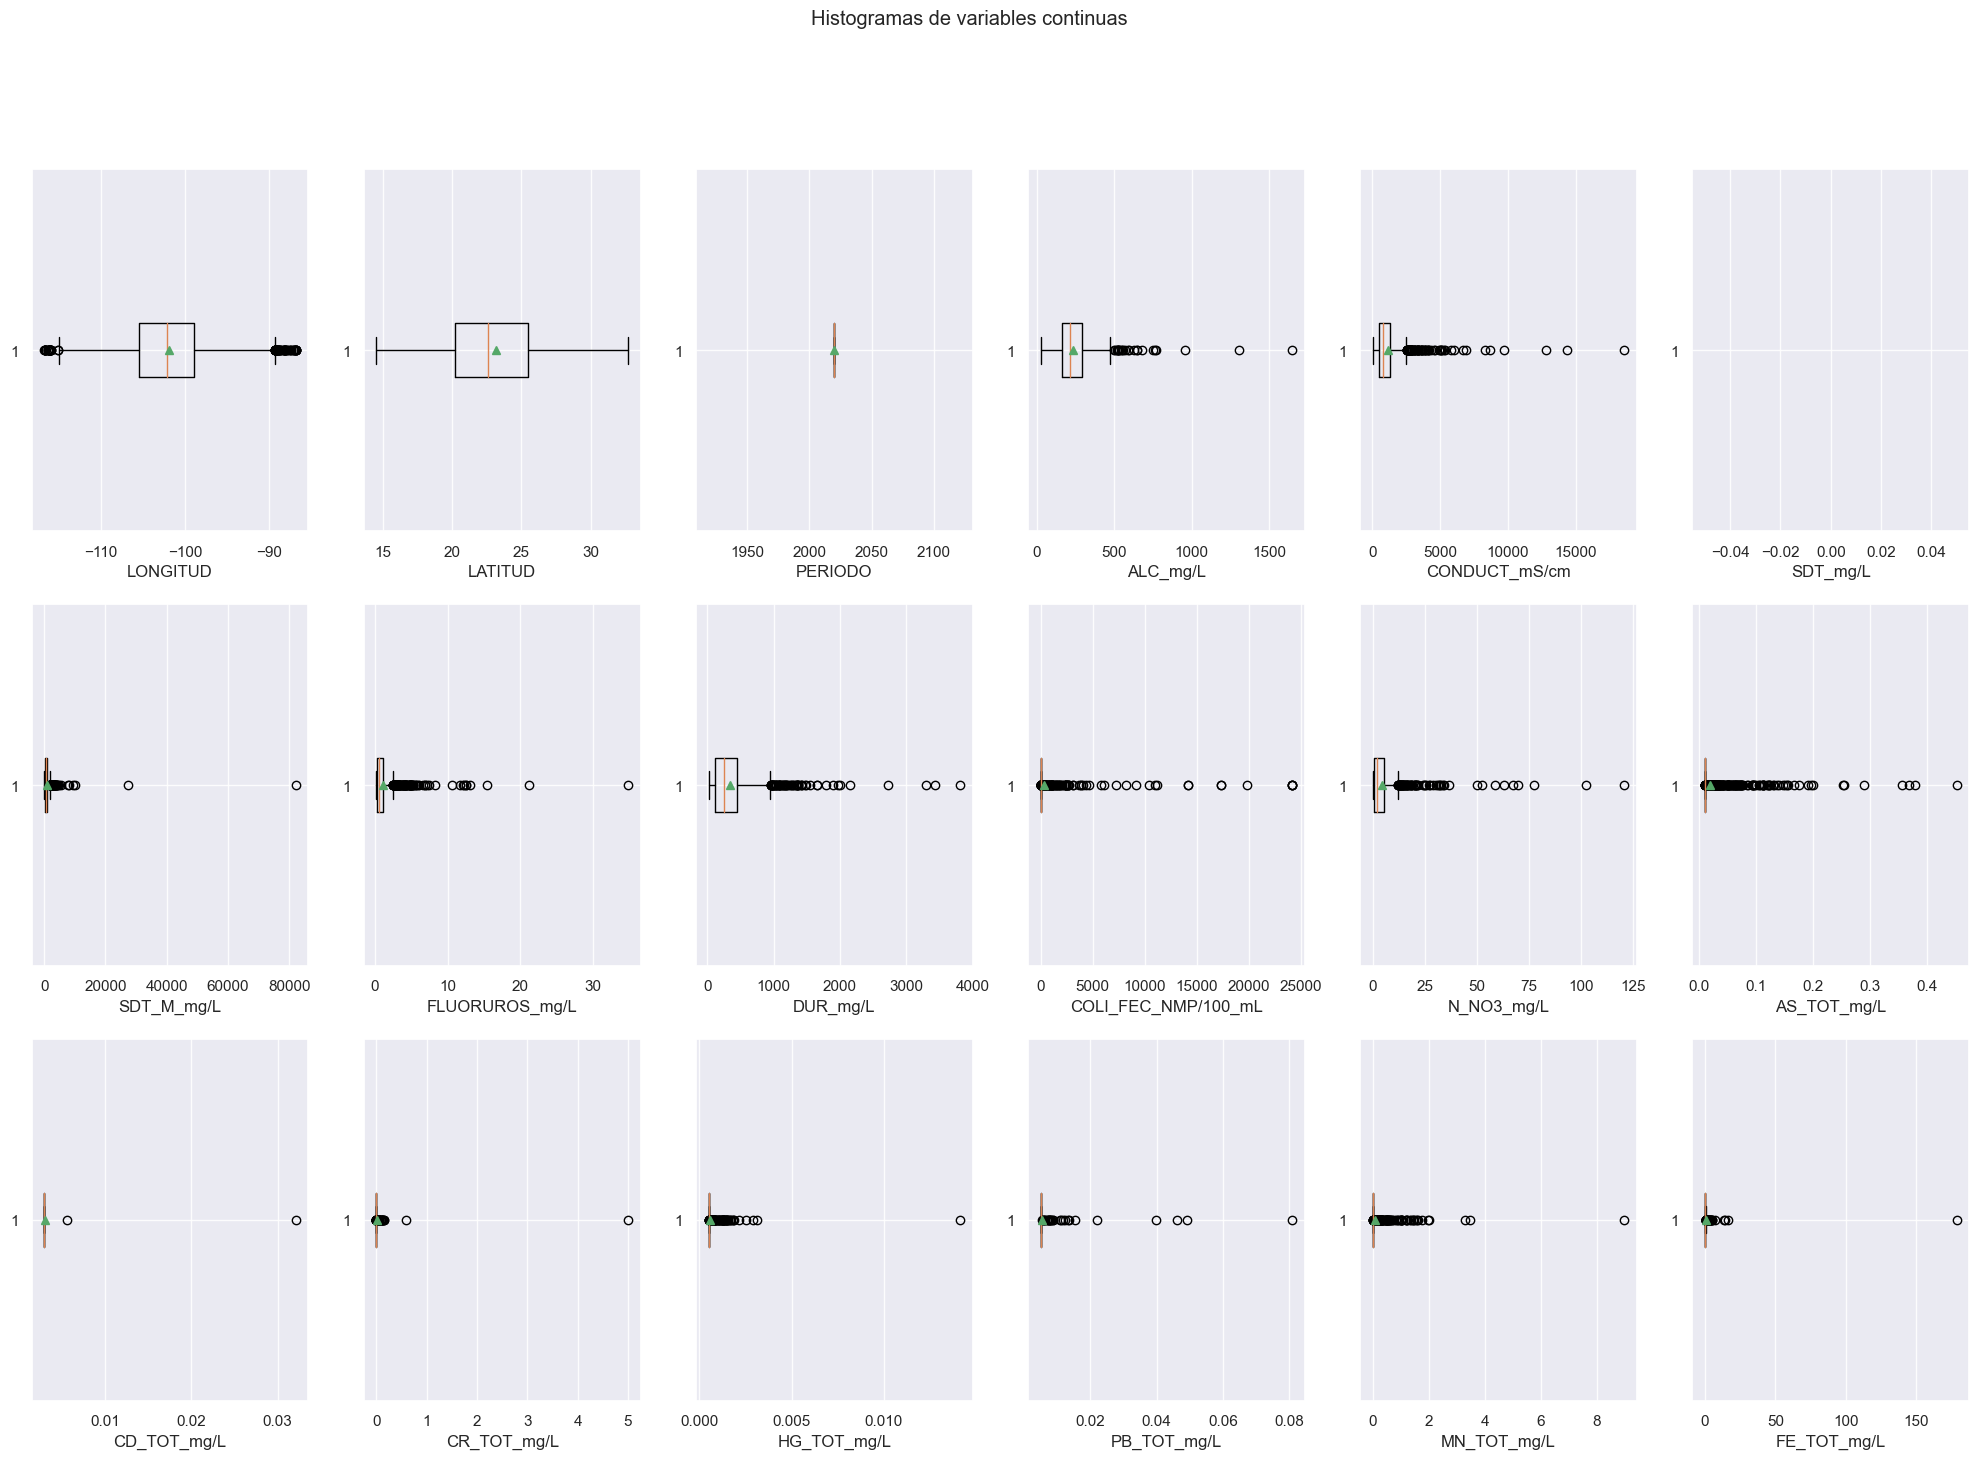

In [17]:
sns.set(rc={'figure.figsize':(25,16)})
i = 0
fig, axes = plt.subplots(3, 6)    
for col in float_columns:
  plt.subplot(3,6,i+1)    
  plt.boxplot(df_sub[col].dropna(), showmeans=True, vert=False)   
  plt.xlabel(col)
  i+=1

fig.suptitle('Histogramas de variables continuas')
plt.show()

### Boxplots por semaforo

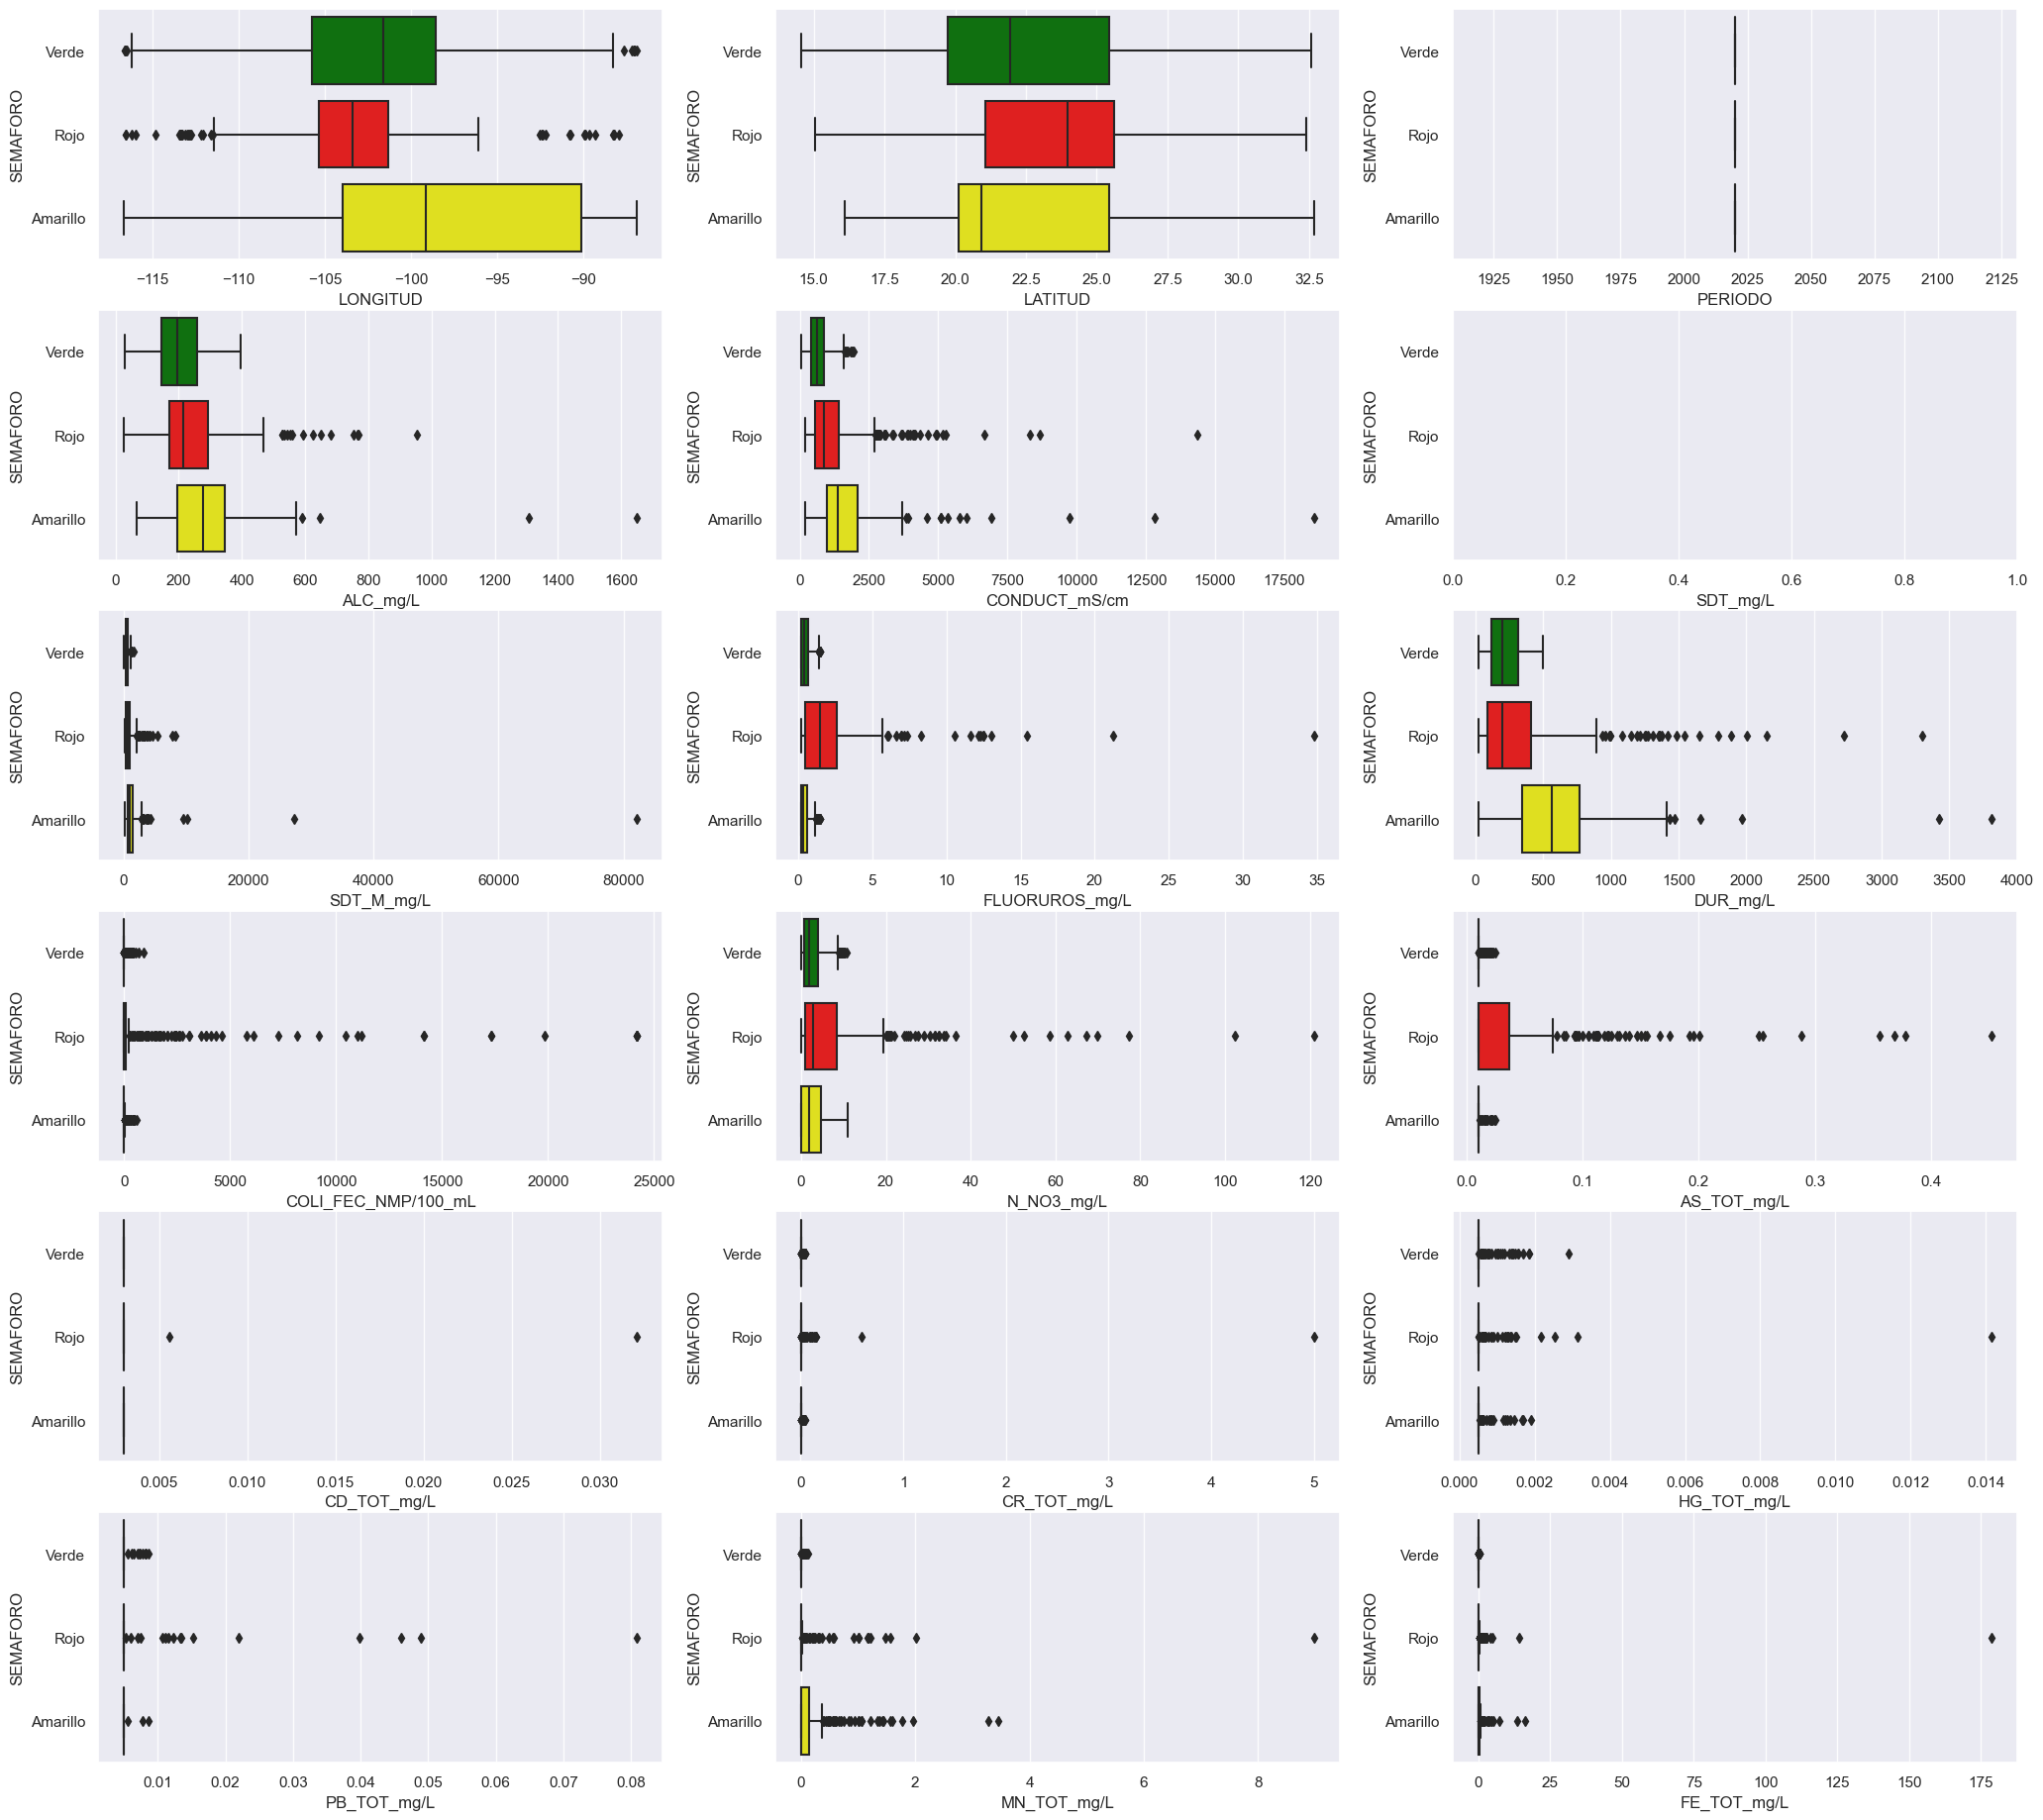

In [18]:
sns.set(rc={'figure.figsize':(25,23)})
fig, axes = plt.subplots(6, 3)    
i = 0

for col in float_columns:
    plt.subplot(6,3,i+1) 
    sns.boxplot(y='SEMAFORO',
                x=col,
                data=df_sub,
                orient='horizontal',
                palette=colors_palete)
    plt.xlabel(col)
    i+=1

### Correlacion de columnas continuas

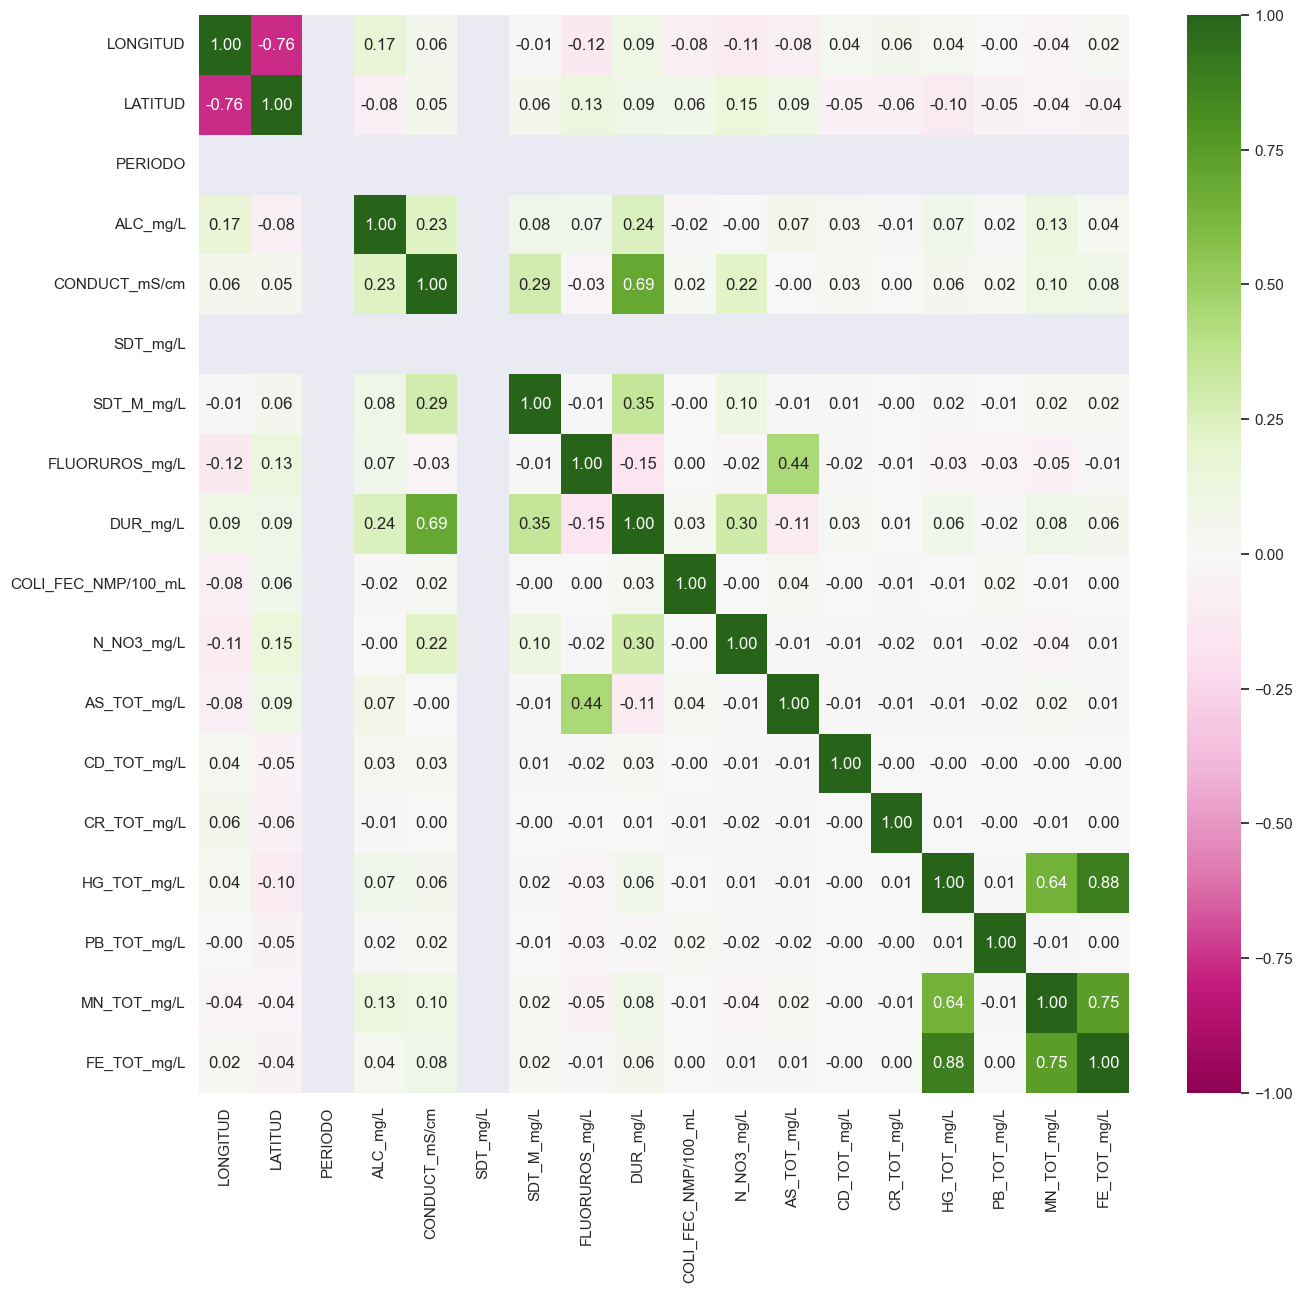

In [19]:
sns.set(rc={'figure.figsize':(15,14)}) 

sns.heatmap(df_sub.corr(method='pearson'), cmap='PiYG', annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.show()

In [20]:
categorical_columns = [col for col in df_sub.columns if df_sub[col].dtypes == object][1:]
print(len(categorical_columns), categorical_columns)

38 ['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'CALIDAD_ALC', 'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']


## Contaminantes

Conteo de contaminates para cada dato

In [21]:
#esto lo hacemos para convertir la lista de contaminantes a un número entero mediante conteo.
#NaN significa que no tiene contaminantes.
for row in df_sub.index:
  try:
    df_sub.at[row,"CONTAMINANTES"] = len(df_sub.loc[row]["CONTAMINANTES"])
  except:
    pass

In [22]:
df_sub["CONTAMINANTES"]

0       NaN
1       NaN
2         8
3       NaN
4         4
       ... 
1063     14
1064      4
1065     14
1066    NaN
1067    NaN
Name: CONTAMINANTES, Length: 1068, dtype: object

In [23]:
porcentaje_na=(df_sub["CONTAMINANTES"].isna().sum()/df_sub["CONTAMINANTES"].shape[0])*100
print(round(porcentaje_na, 2),"%")

40.64 %


In [24]:
df_sub['CONTAMINANTES'].fillna(value = 0, inplace=True)
df_sub["CONTAMINANTES"] = df_sub["CONTAMINANTES"].astype(int)

In [25]:
df_sub["CONTAMINANTES"].min(),df_sub["CONTAMINANTES"].max(),df_sub["CONTAMINANTES"].value_counts()

(0,
 45,
 0     434
 3     185
 5      78
 8      70
 6      52
 4      38
 7      34
 10     34
 9      20
 27     18
 11     13
 13     12
 14      8
 12      7
 31      7
 30      6
 23      5
 33      5
 36      4
 34      4
 15      4
 39      3
 20      3
 16      3
 35      3
 24      3
 38      2
 29      2
 37      2
 42      2
 18      2
 26      1
 17      1
 45      1
 32      1
 21      1
 Name: CONTAMINANTES, dtype: int64)

## Contaminantes por semaforo

In [26]:
#Evaluamos la cantidad de contaminantes, se evidencia que la clase verde en el semáforo no tiene contaminantes.

In [27]:
df_contamientes = df_sub.groupby(['SEMAFORO'], as_index=False).agg({'CONTAMINANTES':'sum'})
df_contamientes

,SEMAFORO,CONTAMINANTES
0,Amarillo,1969
1,Rojo,3627
2,Verde,0


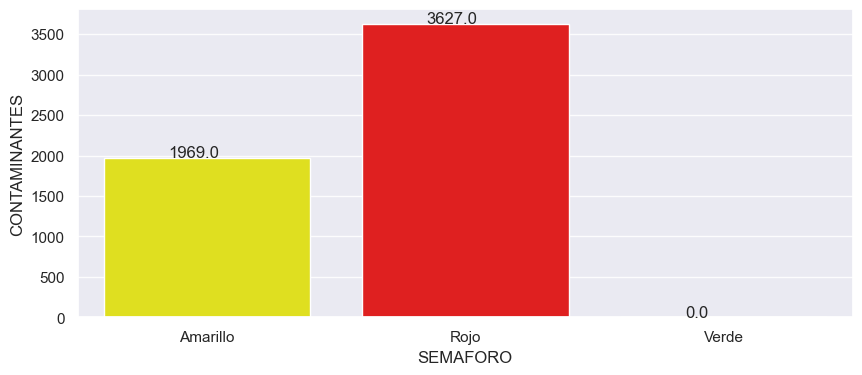

In [28]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=df_contamientes, x='SEMAFORO', y='CONTAMINANTES', palette=['yellow','red', 'green'])

for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.25,p.get_height()+5))

plt.show()

## Dataframe acondicionado

In [29]:
#en una nueva variable reemplazamos las palabras por números para realizar un mejor tratamiento de la información
df_sub['SEMAFORO_cat'] = df_sub['SEMAFORO'].replace({'Verde':0,
                                                     'Amarillo':1,
                                                     'Rojo':2})

df_sub['SEMAFORO_cat'] = df_sub['SEMAFORO_cat'].astype(int)

In [30]:
#eliminamos las variables que no aportan al análisis
df_sub_clean = df_sub.drop(['SEMAFORO', 'PERIODO', 'SDT_mg/L'], axis=1)

In [31]:
df_sub_clean.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_mg/L             float64
CALIDAD_

In [32]:
clean_float_columns = [col for col in df_sub_clean.columns if df_sub_clean[col].dtypes != object]
print(len(clean_float_columns), clean_float_columns)

18 ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'CONTAMINANTES', 'SEMAFORO_cat']


### Visualizacion de dataframe acondicionado

In [33]:
clean_color_list = ['green','yellow','red']
clean_colors_palete = sns.color_palette(clean_color_list)

------------------------ 


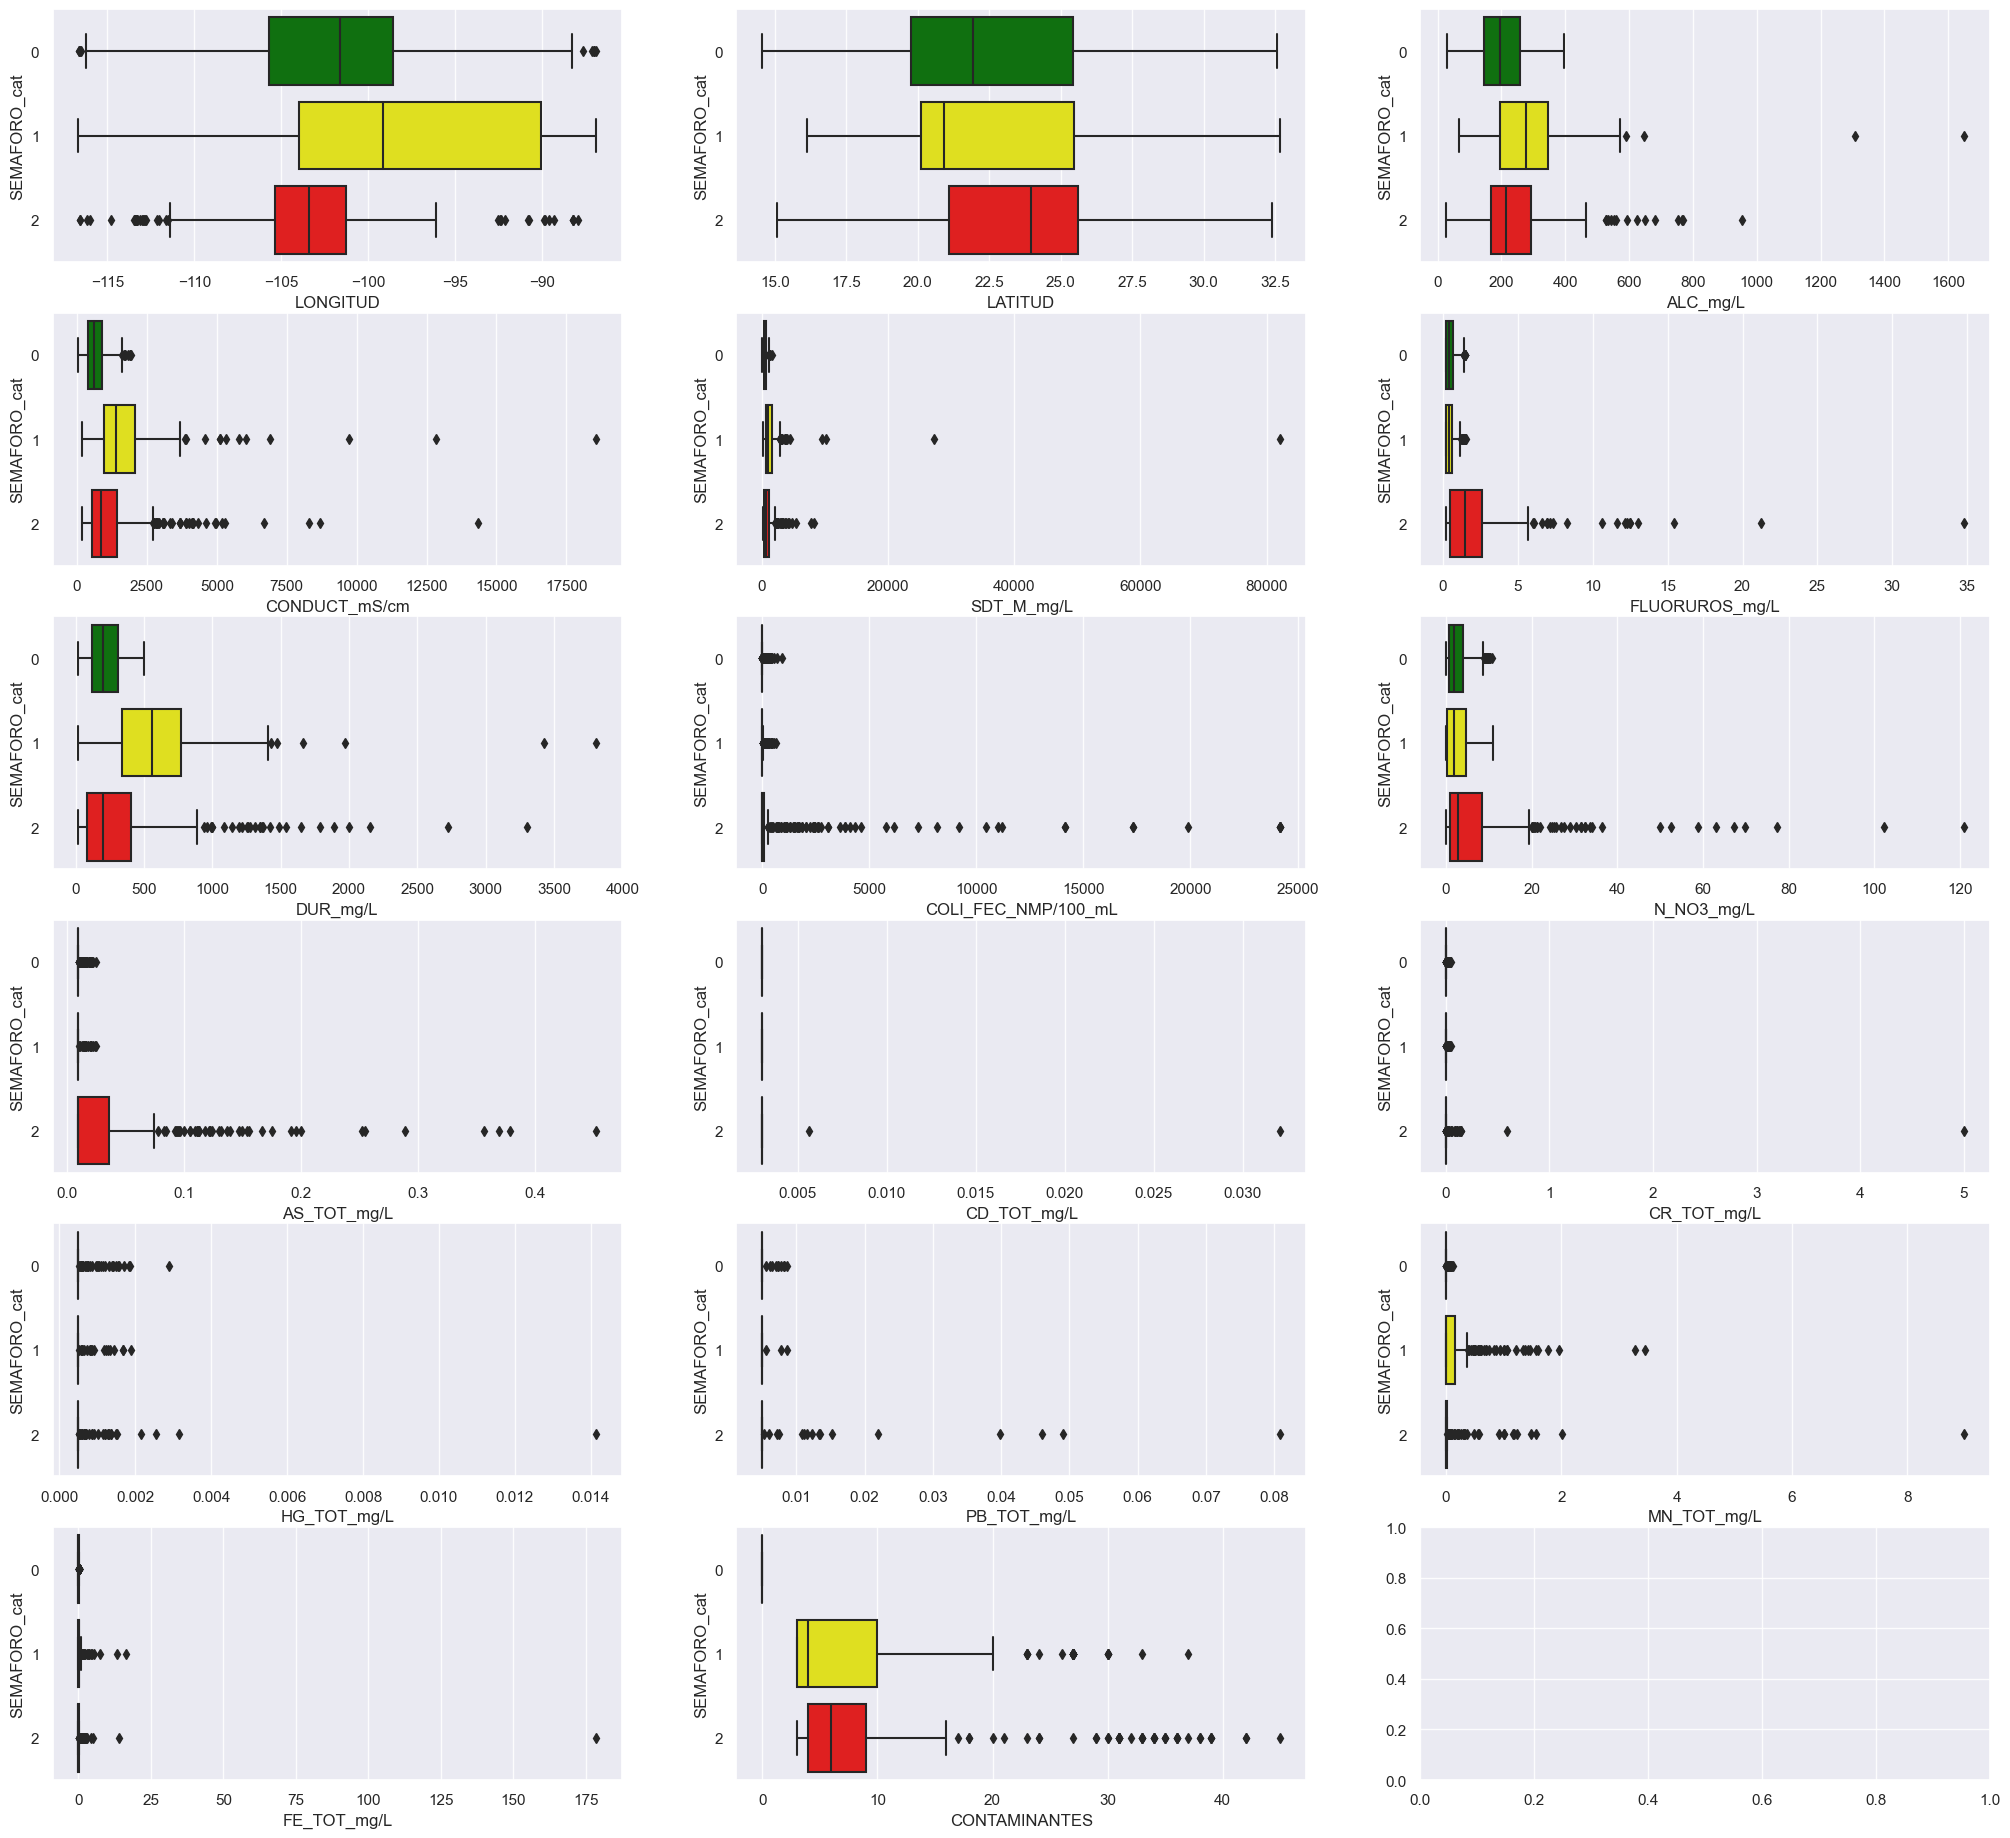

In [34]:
  sns.set(rc={'figure.figsize':(25,23)})
  fig, axes = plt.subplots(6, 3)    
  i = 0

  for col in clean_float_columns[:-1]:
    plt.subplot(6,3,i+1) 
    sns.boxplot(y='SEMAFORO_cat',
                x=col,
                data=df_sub,
                orient='horizontal',
                palette=clean_colors_palete)
    plt.xlabel(col)
    i+=1
  print("------------------------ ")

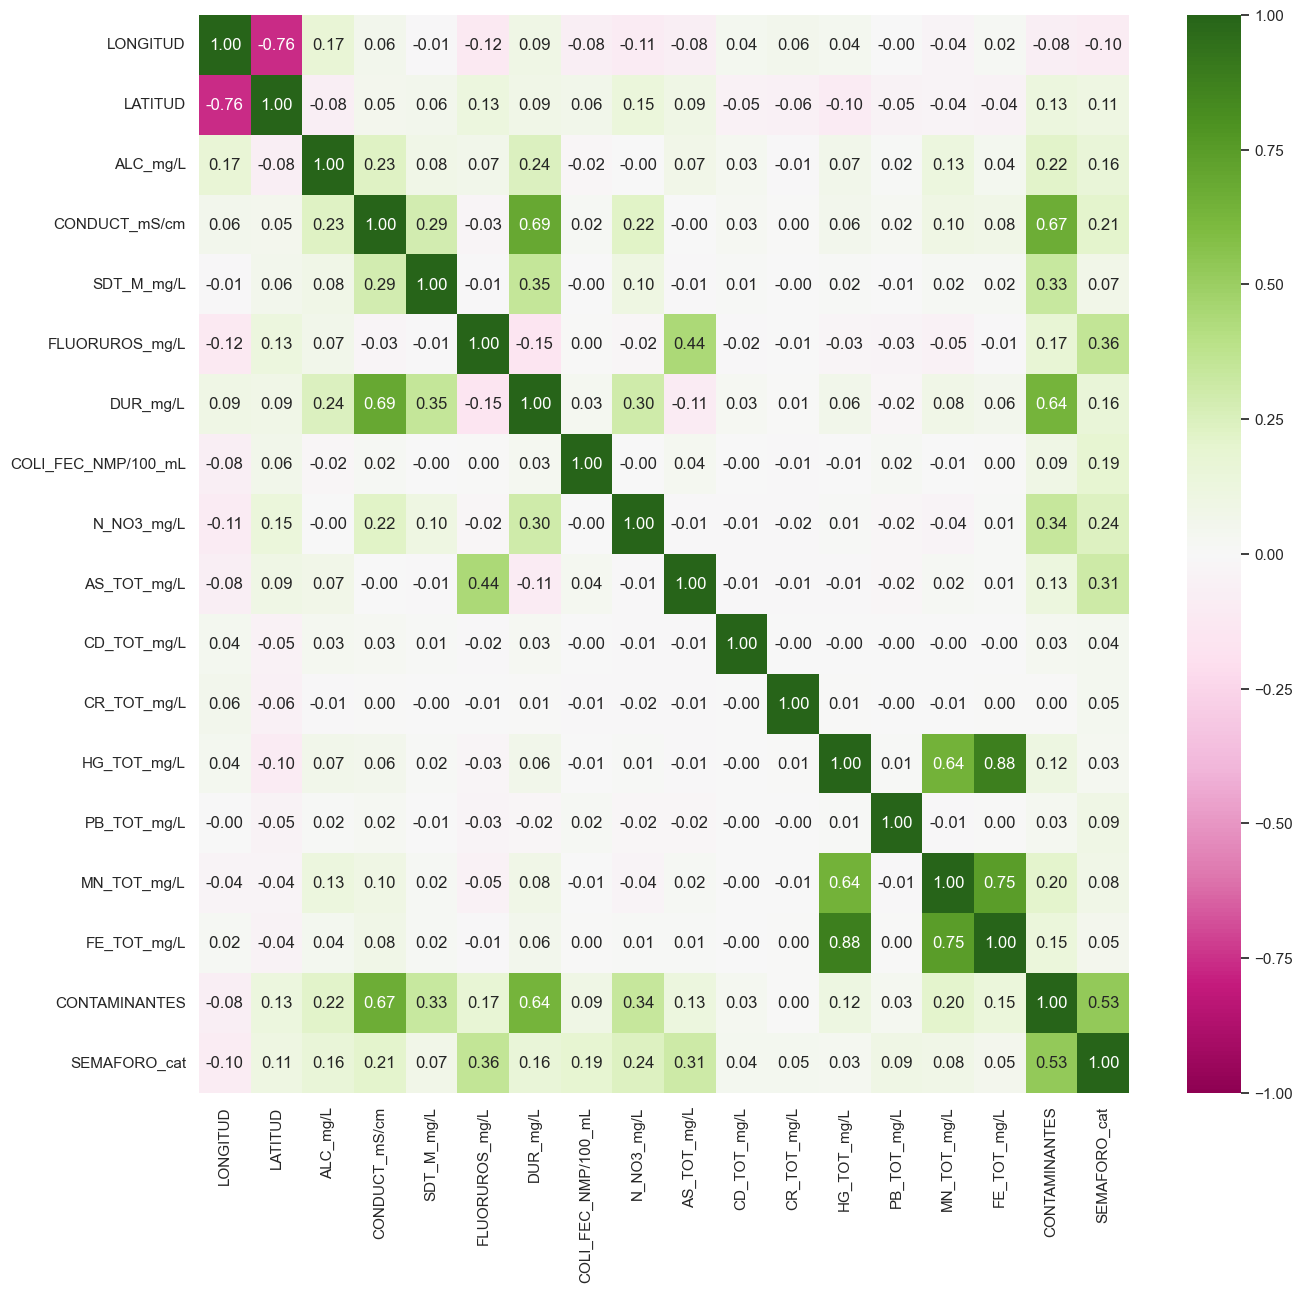

In [35]:
sns.set(rc={'figure.figsize':(15,14)}) 

sns.heatmap(df_sub_clean.corr(method='pearson'), cmap='PiYG', annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.show()

Existe alta correlacio con la cantidad de contamiantes y el codigo de semaforo

In [36]:
#sns.set(rc={'figure.figsize':(18,12)})
#sns.pairplot(df_sub_clean, height=5, diag_kind='auto', corner=False, hue='SEMAFORO_cat', palette=clean_colors_palete)
#plt.show()

Vamos a graficar las coordenadas

In [37]:
df_sub_clean["Coordinates"] = list(zip(df_sub_clean.LONGITUD, df_sub_clean.LATITUD))
df_sub_clean["Coordinates"] = df_sub_clean["Coordinates"].apply(Point)

In [38]:
df_sub_clean['SEMAFORO_cat'].unique()

array([0, 2, 1])

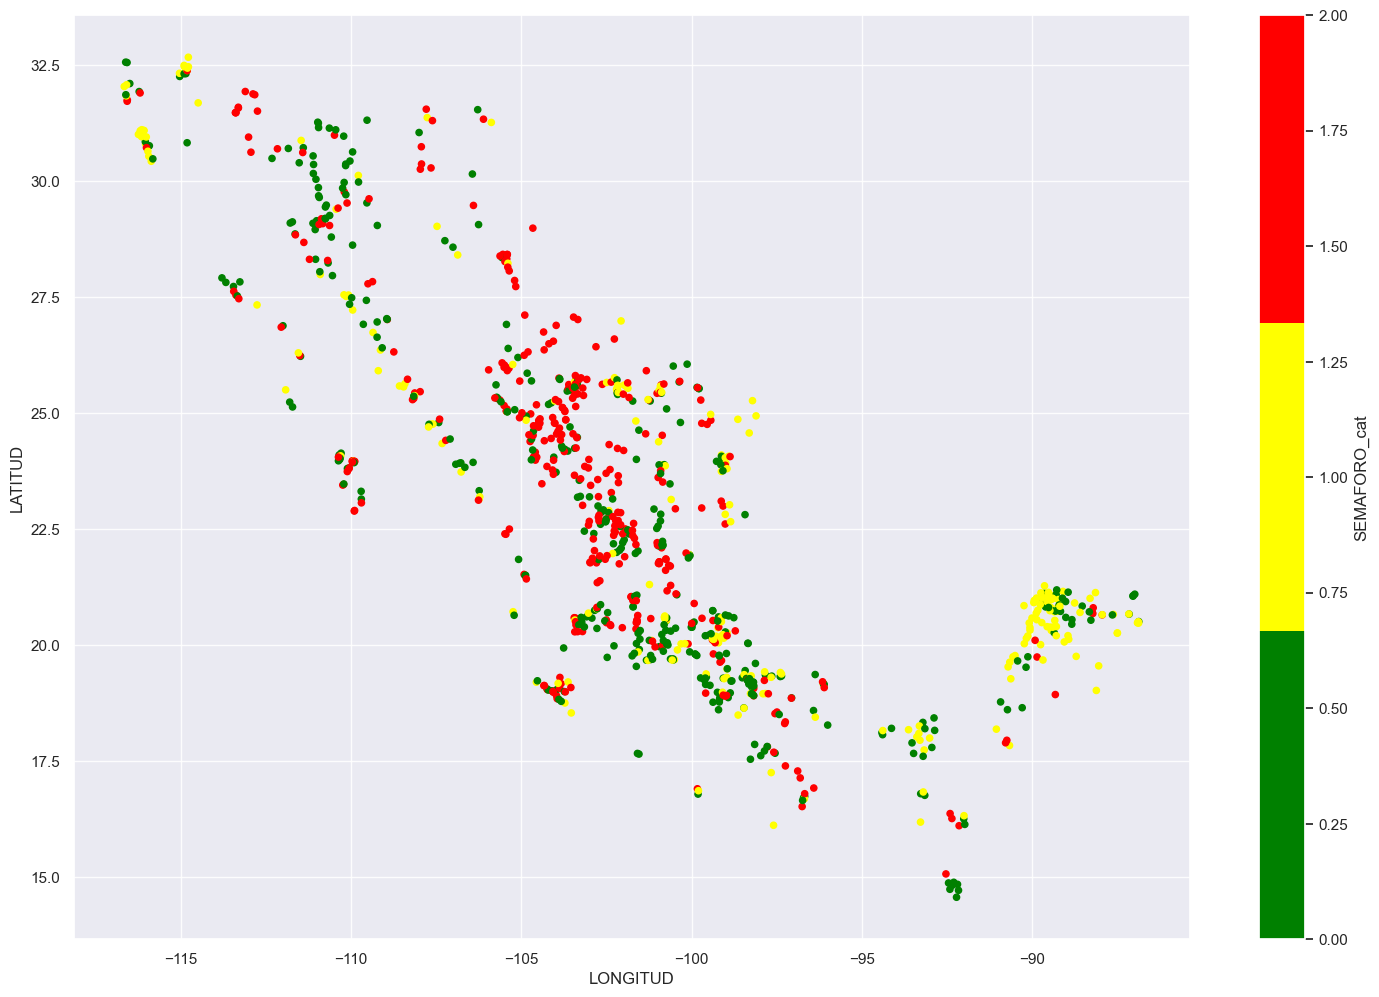

In [39]:
latlong=df_sub_clean[['LATITUD','LONGITUD', 'SEMAFORO_cat']]

sns.set(rc={'figure.figsize':(18,12)})
latlong.plot.scatter('LONGITUD','LATITUD', c='SEMAFORO_cat', cmap=ListedColormap(clean_color_list))

plt.show()

In [40]:
df_sub_clean['ORGANISMO_DE_CUENCA'].value_counts().count()
df_sub_clean['ORGANISMO_DE_CUENCA'].unique()

array(['LERMA SANTIAGO PACIFICO', 'PENINSULA DE BAJA CALIFORNIA',
       'PENINSULA DE YUCATAN', 'RIO BRAVO', 'CUENCAS CENTRALES DEL NORTE',
       'PACIFICO NORTE', 'BALSAS', 'PACIFICO SUR', 'GOLFO NORTE',
       'AGUAS DEL VALLE DE MEXICO', 'GOLFO CENTRO', 'FRONTERA SUR',
       'NOROESTE'], dtype=object)

In [41]:
#en una nueva variable reemplazamos las palabras por números para realizar un mejor tratamiento de la información
df_sub_clean['ORGANISMO_cat'] = df_sub_clean['ORGANISMO_DE_CUENCA'].replace({'LERMA SANTIAGO PACIFICO':0, 
                                                                 'PENINSULA DE BAJA CALIFORNIA':1,
                                                                 'PENINSULA DE YUCATAN':2, 
                                                                 'RIO BRAVO':3, 
                                                                 'CUENCAS CENTRALES DEL NORTE':4,
                                                                 'PACIFICO NORTE':5, 
                                                                 'BALSAS':6, 
                                                                 'PACIFICO SUR':7, 
                                                                 'GOLFO NORTE':8,
                                                                 'AGUAS DEL VALLE DE MEXICO':9, 
                                                                 'GOLFO CENTRO':10, 
                                                                 'FRONTERA SUR':11,
                                                                 'NOROESTE':12})

df_sub_clean['ORGANISMO_cat'] = df_sub_clean['ORGANISMO_cat'].astype(int)
df_sub_clean['ORGANISMO_cat']

0       0
1       0
2       0
3       0
4       1
       ..
1063    3
1064    3
1065    3
1066    3
1067    3
Name: ORGANISMO_cat, Length: 1068, dtype: int32

In [42]:
import matplotlib.pyplot as plt
import random

number_of_colors = df_sub_clean['ORGANISMO_DE_CUENCA'].value_counts().count()

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

clean_colors_palete2 = sns.color_palette(color)
clean_colors_palete2

[(0.5490196078431373, 0.1411764705882353, 0.4),
 (0.34901960784313724, 0.050980392156862744, 0.34509803921568627),
 (0.6235294117647059, 0.3764705882352941, 0.10588235294117647),
 (0.49019607843137253, 0.19215686274509805, 0.6549019607843137),
 (0.803921568627451, 0.7137254901960784, 0.8823529411764706),
 (0.9450980392156862, 0.6274509803921569, 0.12549019607843137),
 (0.24313725490196078, 0.10588235294117647, 0.33725490196078434),
 (0.08235294117647059, 0.3411764705882353, 0.8196078431372549),
 (0.7098039215686275, 0.3803921568627451, 0.5372549019607843),
 (0.13725490196078433, 0.3176470588235294, 0.24705882352941178),
 (0.4627450980392157, 0.33725490196078434, 0.00784313725490196),
 (0.3607843137254902, 0.8431372549019608, 0.9254901960784314),
 (0.788235294117647, 0.14901960784313725, 0.5607843137254902)]

In [43]:
latlong2=df_sub_clean[['LATITUD','LONGITUD', 'ORGANISMO_cat']]
latlong2

,LATITUD,LONGITUD,ORGANISMO_cat
0,22.20887,-102.02210,0
1,21.99958,-102.20075,0
2,22.36685,-102.28801,0
3,22.18435,-102.29449,0
4,23.45138,-110.24480,1
...,...,...,...
1063,24.76036,-99.54191,3
1064,24.78280,-99.70099,3
1065,25.55197,-99.82249,3
1066,24.80118,-100.32683,3


In [44]:
#Poligonos de paises
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

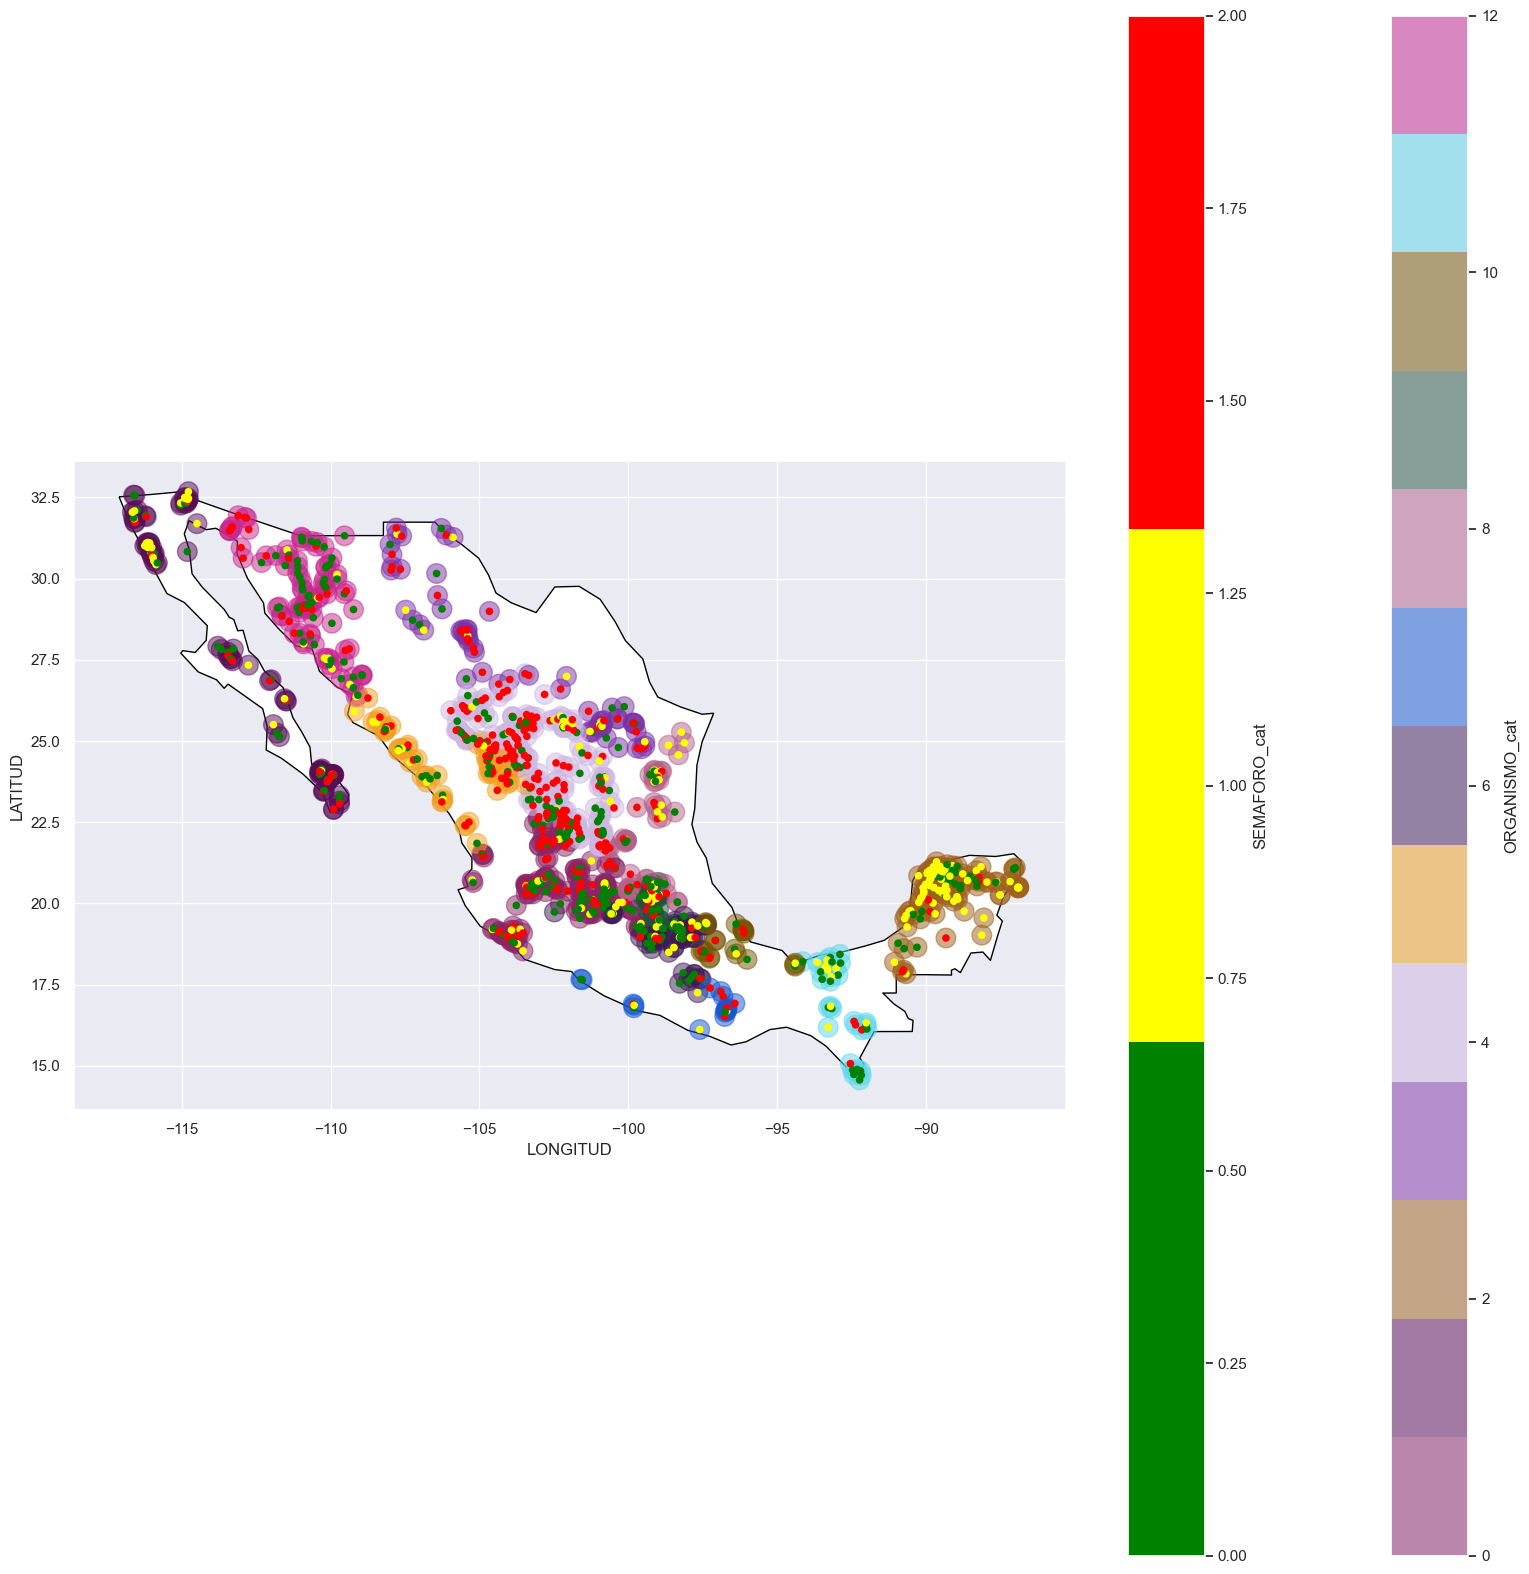

In [45]:
fig, gax = plt.subplots(figsize=(20,20))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

latlong2.plot.scatter('LONGITUD','LATITUD', c='ORGANISMO_cat', cmap=ListedColormap(color), ax=gax, s=200, alpha=0.5)
latlong.plot.scatter('LONGITUD','LATITUD', c='SEMAFORO_cat', cmap=ListedColormap(clean_color_list), ax=gax)

plt.show()

gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Clasificacion de aguas subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [46]:
#debido a que la mayoría de los datos son POZO, no podríamos observar una tendencia debido a esta variable.
df_sub_clean['SUBTIPO'].value_counts()

POZO             1039
MANANTIAL          12
CENOTE              7
POZO NORIA          4
NORIA               3
DESCARGA            1
Pozo                1
BOMBEO CENOTE       1
Name: SUBTIPO, dtype: int64

In [47]:
df_sub_clean.head().T

,0,1,2,3,4
CLAVE,DLAGU6,DLAGU6516,DLAGU7,DLAGU9,DLBAJ107
SITIO,POZO SAN GIL,POZO R013 CAÑADA HONDA,POZO COSIO,POZO EL SALITRILLO,RANCHO EL TECOLOTE
ORGANISMO_DE_CUENCA,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,LERMA SANTIAGO PACIFICO,PENINSULA DE BAJA CALIFORNIA
ESTADO,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,BAJA CALIFORNIA SUR
MUNICIPIO,ASIENTOS,AGUASCALIENTES,COSIO,RINCON DE ROMOS,LA PAZ
ACUIFERO,VALLE DE CHICALOTE,VALLE DE CHICALOTE,VALLE DE AGUASCALIENTES,VALLE DE AGUASCALIENTES,TODOS SANTOS
SUBTIPO,POZO,POZO,POZO,POZO,POZO
LONGITUD,-102.0221,-102.20075,-102.28801,-102.29449,-110.2448
LATITUD,22.20887,21.99958,22.36685,22.18435,23.45138
ALC_mg/L,229.99,231.99,204.92,327.0,309.885


##Kmeans

In [48]:
from sklearn.cluster import KMeans

Vamos a escoger el mejor número 

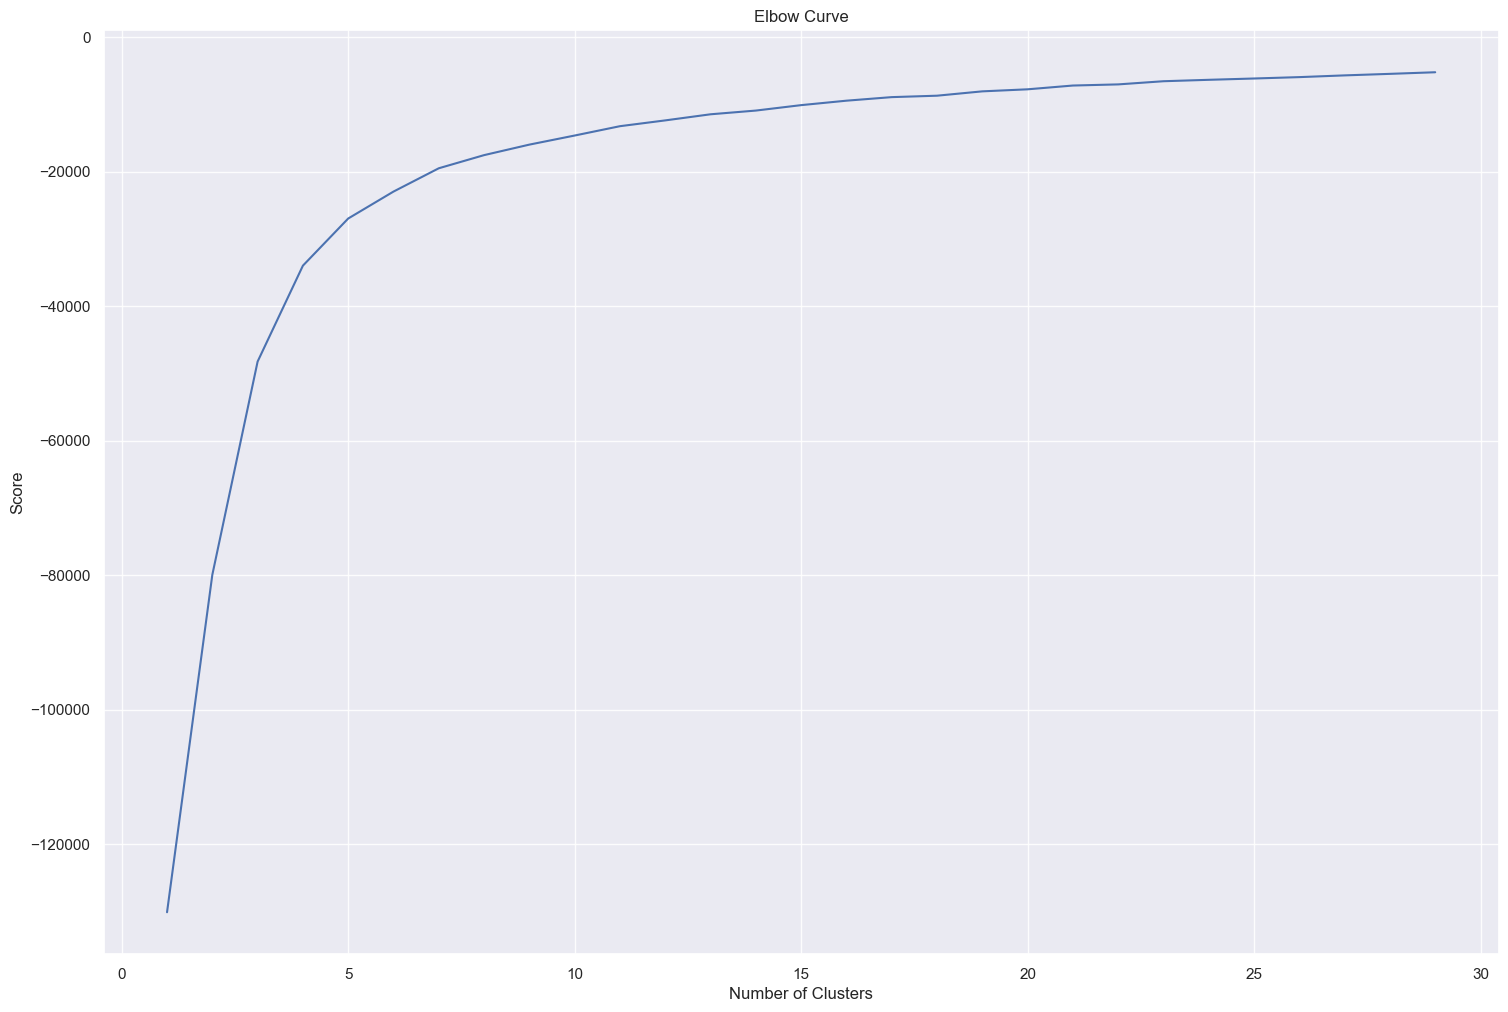

In [49]:
latlong = df_sub_clean[['LATITUD','LONGITUD','CONTAMINANTES']]
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [50]:
k = 30
kmeans = KMeans(n_clusters=k, random_state=42)
mkr_dict = {0: 'o', 1: '+', 2: 'x'}

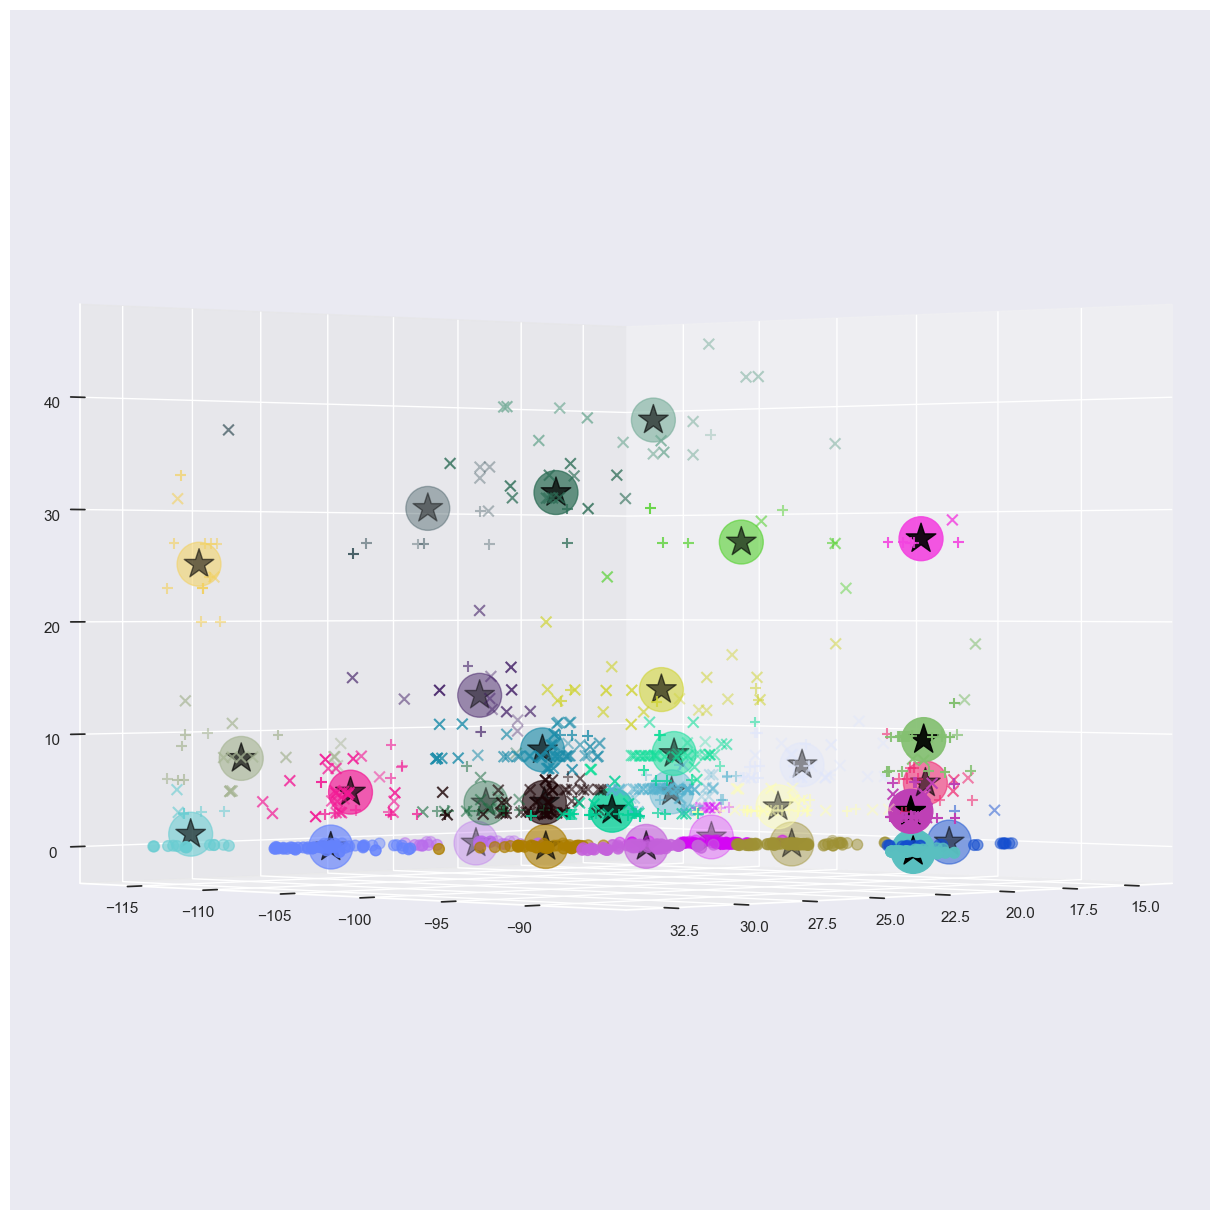

In [51]:
latlong3D = df_sub_clean[['LATITUD','LONGITUD', 'CONTAMINANTES']]
# Predicting the clusters
labels = kmeans.fit_predict(latlong3D)
# Getting the cluster centers
C = kmeans.cluster_centers_
 
fig = plt.figure()
#ax = Axes3D(fig, elev=-90, azim=0) #para verlo como el mapa
ax = Axes3D(fig, elev=0, azim=45) #para verlo normal

latlong3D['SEMAFORO_cat']=df_sub_clean['SEMAFORO_cat']
latlong3D['kmean_group']=labels

#para el color según k_means_group
number_of_colors3D = latlong3D['kmean_group'].nunique()

color3D = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors3D)]

color_dict=dict((i,j) for i,j in enumerate(color3D))

latlong3D['color']= latlong3D['kmean_group'].map(color_dict)

for sem, mkr in mkr_dict.items():
    d = latlong3D[latlong3D.SEMAFORO_cat==sem]
    ax.scatter(d['LATITUD'], d['LONGITUD'], d['CONTAMINANTES'], marker=mkr, c=d['color'],s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c=color3D, s=1000)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=500)

In [52]:
#y_pred = kmeans.fit_predict(df_sub_clean[['LONGITUD','LATITUD']])
y_pred = kmeans.fit_predict(df_sub_clean[['LONGITUD','LATITUD','SEMAFORO_cat']])
#y_pred = kmeans.fit_predict(df_sub_clean[['LONGITUD','LATITUD','ORGANISMO_cat','CONTAMINANTES']])

df_sub_clean['kmean_group'] = y_pred
#latlong = df_sub_clean[['LATITUD','LONGITUD', 'SEMAFORO_cat','kmean_group']]
latlong = df_sub_clean[['LATITUD','LONGITUD', 'SEMAFORO_cat','ORGANISMO_cat','CONTAMINANTES','kmean_group']]

latlong['marker'] = latlong['SEMAFORO_cat'].replace(mkr_dict)

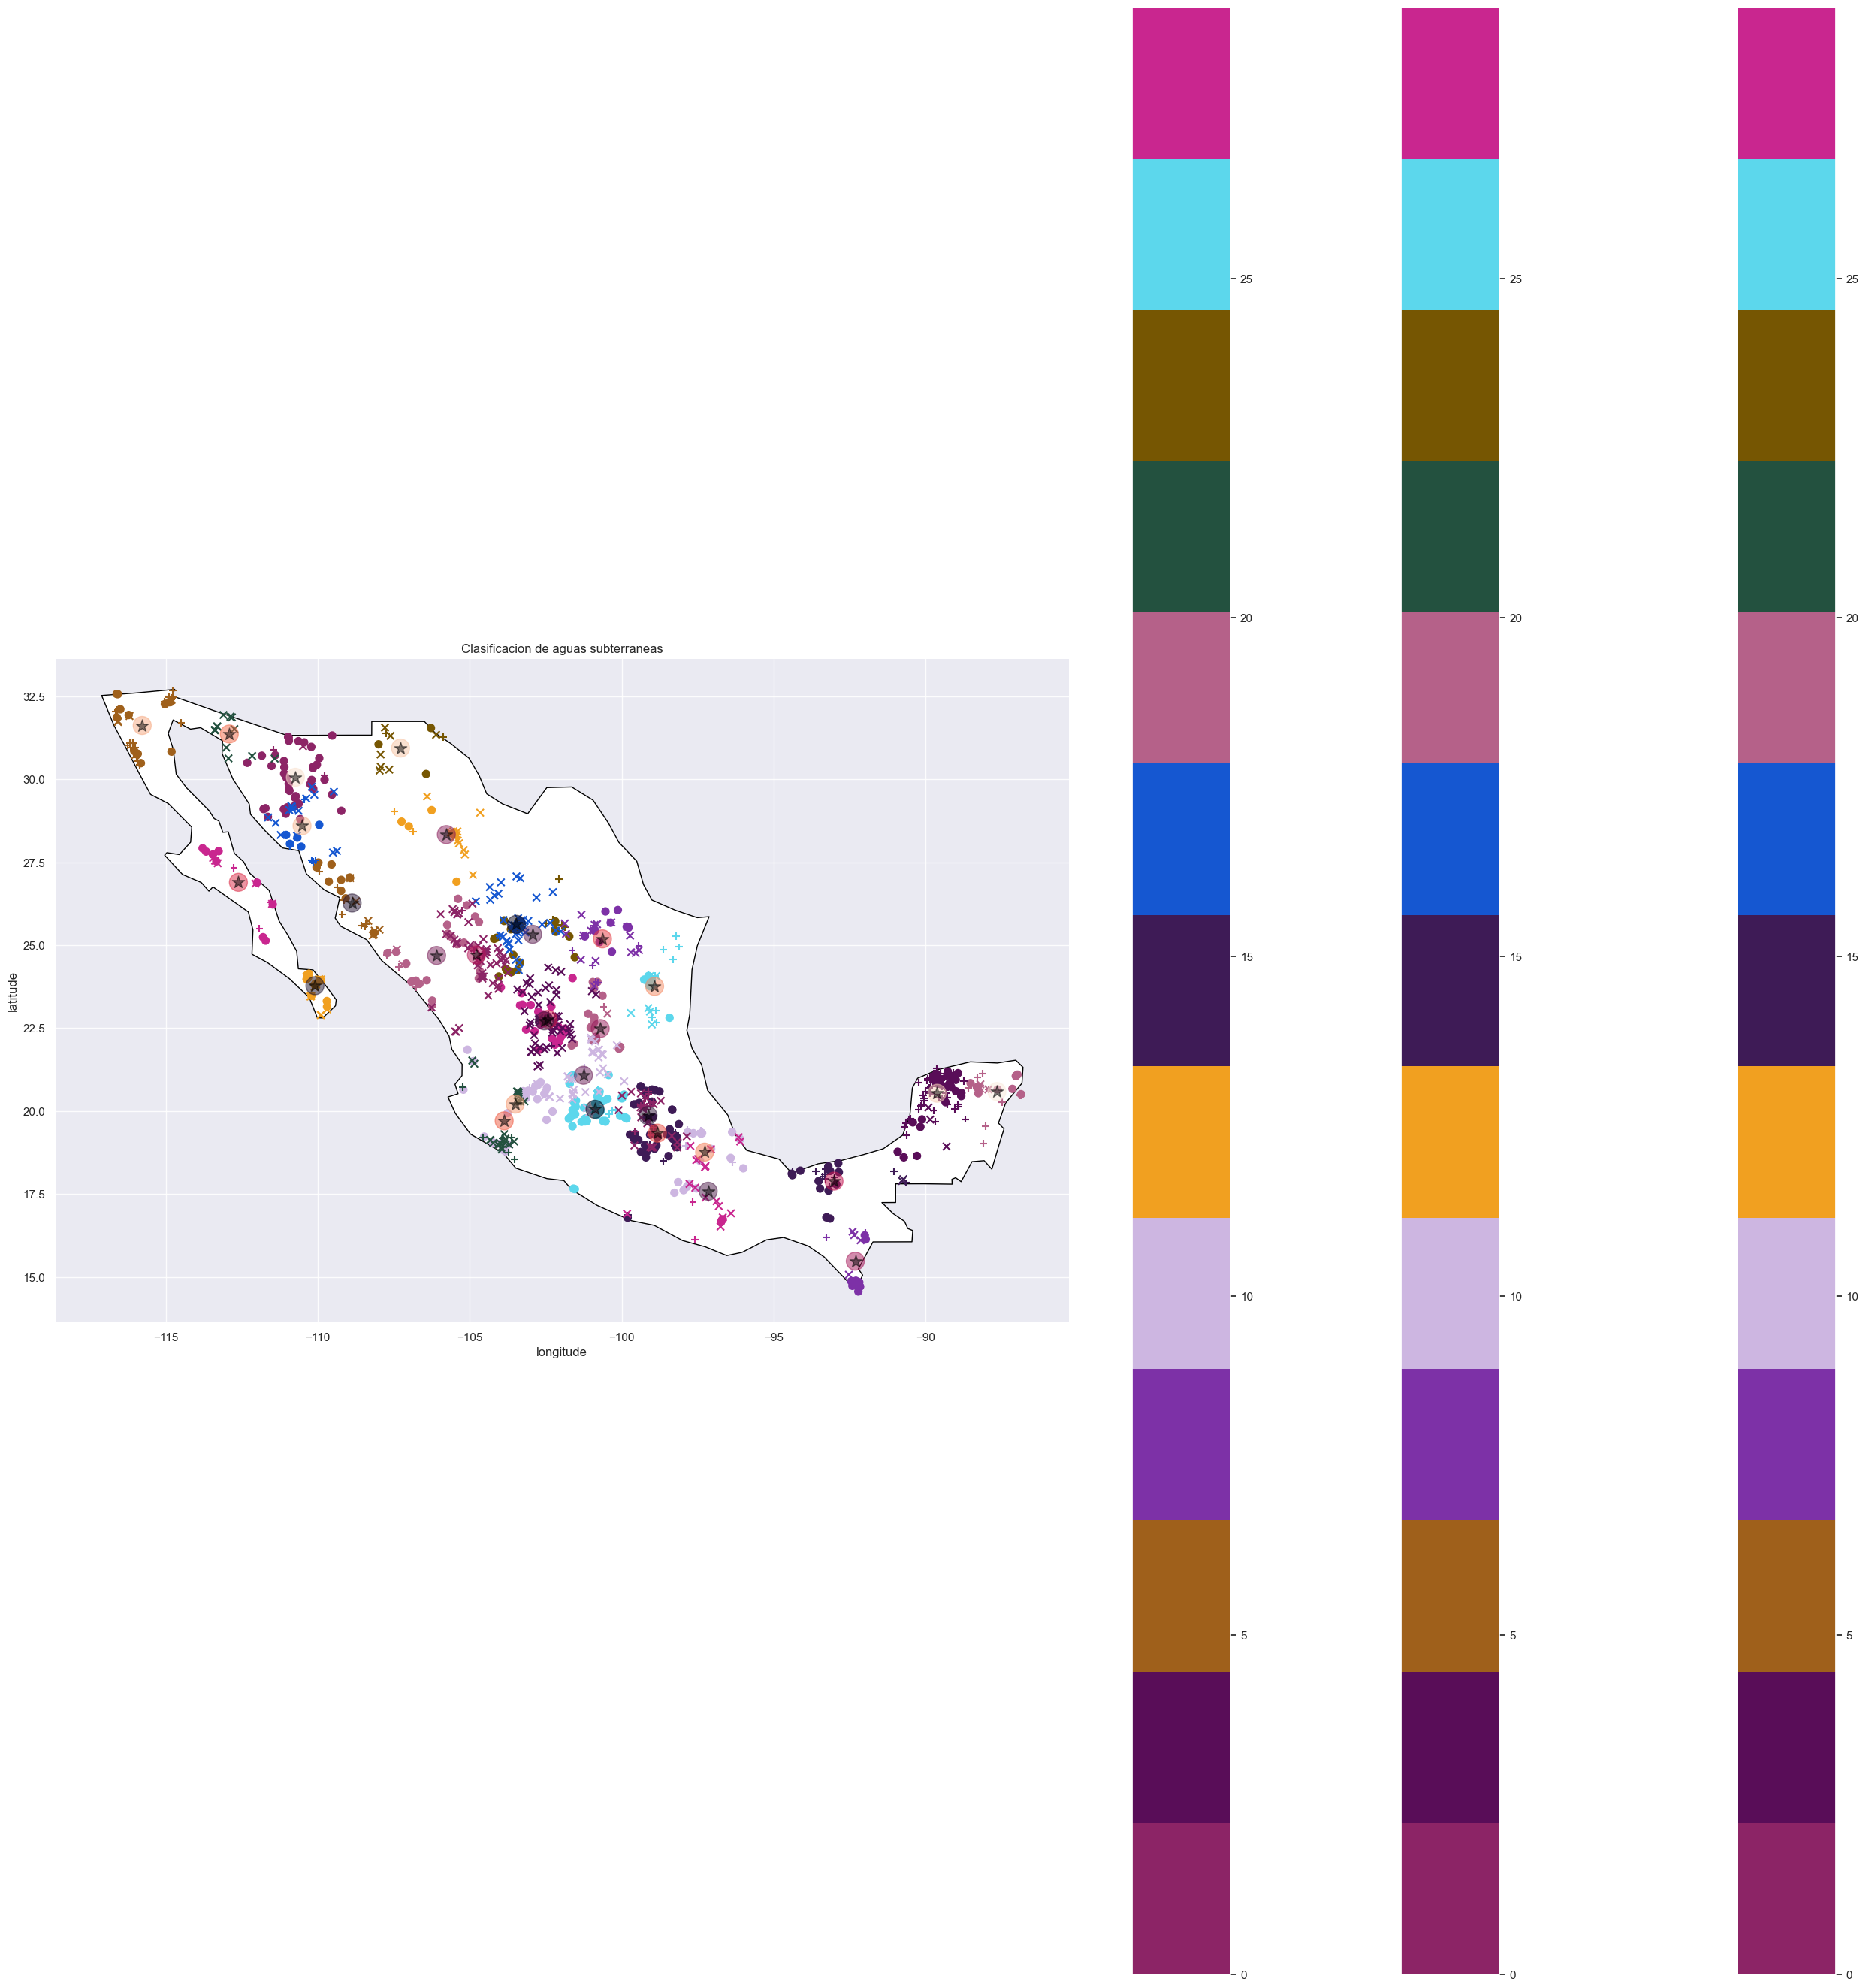

In [53]:
fig, gax = plt.subplots(figsize=(34,34))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

sem=0
#SEMAFORO_cat = 'Verde':0:'o', 'Amarillo':1:'+', 'Rojo':2:'x'
for sem, mkr in mkr_dict.items():
    d = latlong[latlong.SEMAFORO_cat==sem]
    #gax.scatter(x=d.LONGITUD, y=d.LATITUD, marker=mkr, c=d.kmean_group, cmap='tab20', s=200)
    d.plot.scatter('LONGITUD','LATITUD', marker=mkr, c=d.kmean_group, cmap=ListedColormap(color), ax=gax, s=50)
        
#para hacer los centros
gax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=pd.DataFrame(y_pred)[0].unique(), marker='o', s=300, alpha=0.5)
gax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='*', s=150, alpha=0.5)
    
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clasificacion de aguas subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

#gax.legend().set_visible(False)
#gax.legend_ = None
#plt.legend('',frameon=False)

#fig.legend()

#fig.legends = []

plt.show()